# **Project Title : Netflix movie and TV show Clustering**

**Project Type - Unsupervised Machine Learning**

**Contribution - Individual**

**Name - Faruq Shaikh**

## **GitHub Link -**

# **Project Summary**

*   The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

**This project followed a step-by-step process:**

*    Handling null values in the dataset.

*   Binning the rating attribute into categories (children-content,teenager-content,Adult-content,family-friendly-content, not rated-content).

*   Performing Exploratory Data Analysis (EDA) to gain insights for preventing subscriber churn.

*   Creating clusters using attributes like director, cast, country, genre, rating, and description. These attributes were tokenized, preprocessed, and vectorized using TF-IDF vectorizer.

*   Reducing the dimensionality of the dataset using PCA to improve performance.
Employing K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining optimal cluster numbers (8 for K-Means, 7 for hierarchical clustering) through various evaluation methods.

*   Developing a content-based recommender system using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.

*   This comprehensive analysis and recommendation system are expected to enhance user satisfaction, leading to improved retention rates for Netflix.

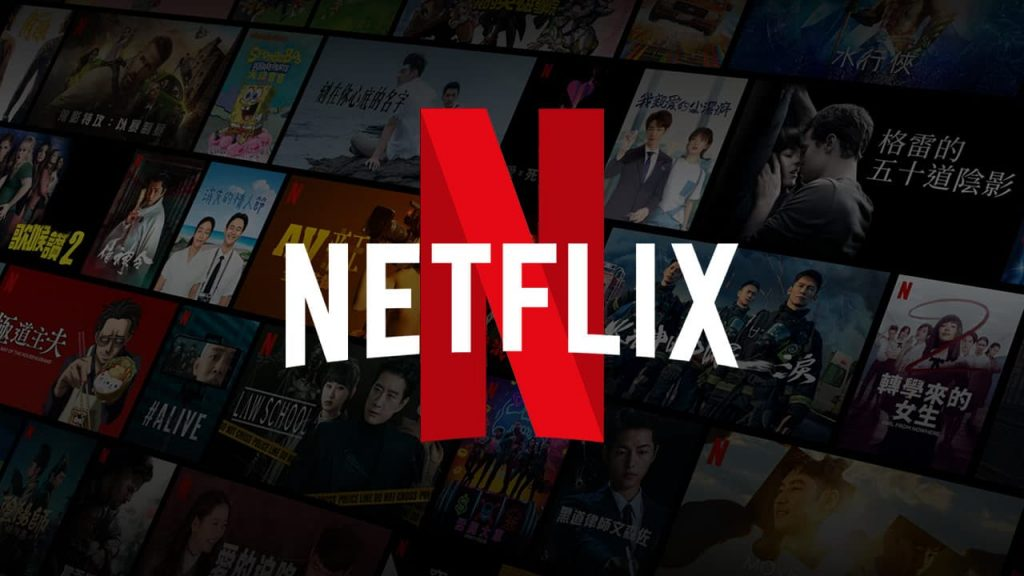

# **Problem Statement**
The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.

## **Know Your Data**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#defining path
path = '/content/drive/MyDrive/CSV files/dat-20230302T130046Z-001/other_csv/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [3]:
#making a dataframe
df = pd.read_csv(path)

In [4]:
#checking first 5 rows of dataset
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
#checking last 5 rows of dataset
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [6]:
#checking shape of dataset
df.shape

(7787, 12)

In [7]:
#checking if our dataset has any duplicate value or not
df.duplicated().sum()

0

In [8]:
#checking if our dataset has any null values or not
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

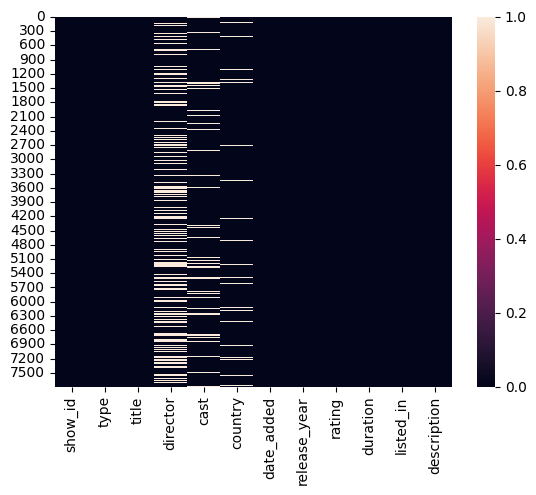

In [9]:
#visualizing null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [10]:
#checking information and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Observations:**
*   **Our dataset contains 7787 rows and 12 columns.**
*   **There are no duplicate rows in our dataset.**
*   **In director there are 2389 null values,in cast column 718 null values,in country column 507 null values,in date_added column 10 null values and in rating 7 null values.**

## **Understanding  Variables**

In [11]:
#checking columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
#dataset describe
df.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

## **Variables Description**

**Attribute Information**

***show_id*** : Unique ID for every Movie / Tv Show

***type*** : Identifier - A Movie or TV Show

***title*** : Title of the Movie / Tv Show

***director*** : Director of the Movie

***cast*** : Actors involved in the movie / show

***country*** : Country where the movie / show was produced

***date_added*** : Date it was added on Netflix

***release_year*** : Actual Releaseyear of the movie / show

***rating*** : TV Rating of the movie / show

***duration*** : Total Duration - in minutes or number of seasons

***listed_in*** : Genere

***description*** : The Summary description

In [13]:
#unique values for each column
for i in df.columns:
  print(f' {i} : {df[i].nunique()}')

 show_id : 7787
 type : 2
 title : 7787
 director : 4049
 cast : 6831
 country : 681
 date_added : 1565
 release_year : 73
 rating : 14
 duration : 216
 listed_in : 492
 description : 7769


In [14]:
#value count for type column
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [15]:
#value count for director column
df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [16]:
#value count for country column
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [17]:
#value count for rating column
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [18]:
#checking percentage missing values for all columns
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [19]:
#making copy of df
df1 = df.copy()

**observation**

*   **Here date_added and rating column has only 10 and 7 missing values.Therefor we can drop those observation to avoid biasness for clustering model.**
*   **country has only 6.5% null values.Therefor we can impute missing values with mode.**
*   **For director and cast columns,neither we can impute missing values nor we can drop those observation as director column has 30% and cast has 9% missing values.We will replace null values with 'unknown'.**

## **Data Wrangling**

In [20]:
#filling null values of director and cast with 'unknown'
df1[['director','cast']] = df1[['director','cast']].fillna('Unknown')

In [21]:
#filling null values of country with its mode value
df1['country'] = df1['country'].fillna(df1['country'].mode()[0])

In [22]:
#checking for null values
df1.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [23]:
#dropping remaining null values
df1.dropna(axis=0,inplace=True)


In [24]:
#checking for null values
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [25]:
#reseting index
df1.reset_index(drop = True,inplace = True)

In [26]:
df1.tail()

show_id     type                                    title     director  \
7765   s7783    Movie                                     Zozo  Josef Fares   
7766   s7784    Movie                                   Zubaan  Mozez Singh   
7767   s7785    Movie                        Zulu Man in Japan      Unknown   
7768   s7786  TV Show                    Zumbo's Just Desserts      Unknown   
7769   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7765  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7766  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7767                                            Nasty C   
7768                         Adriano Zumbo, Rachel Khoo   
7769                                            Unknown   

                                                country          date_added  \
7765  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7766                                              India       March 2, 2019   
7767                                      United States  September 25, 2020   
7768                                          Australia    October 31, 2020   
7769              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7765          2005  TV-MA    99 min   
7766          2015  TV-14   111 min   
7767          2019  TV-MA    44 min   
7768          2019  TV-PG  1 Season   
7769          2019  TV-MA    90 min   

                                              listed_in  \
7765                       Dramas, International Movies   
7766     Dramas, International Movies, Music & Musicals   
7767  Documentaries, International Movies, Music & M...   
7768                 International TV Shows, Reality TV   
7769                    Documentaries, Music & Musicals   

                                            description  
7765  When Lebanon's Civil War deprives Zozo of his ...  
7766  A scrappy but poor boy worms his way into a ty...  
7767  In this documentary, South African rapper Nast...  
7768  Dessert wizard Adriano Zumbo looks for the nex...  
7769  This documentary delves into the mystique behi...

In [27]:
#checking shape of df1
df1.shape

(7770, 12)

In [28]:
#removing min and seasons from the end and typecasting duration in int64
df1['duration'] = df1['duration'].apply(lambda x: int(x.split(' ')[0]))

In [29]:
#converting date_added column to date format
df1['date_added'] = pd.to_datetime(df1['date_added'])

In [30]:
#extracting day,month and year from date_added column
df1['day_added'] = df1['date_added'].dt.day
df1['month_added'] = df1['date_added'].dt.month
df1['year_added'] = df1['date_added'].dt.year

### **What manipulation have been done so far**
*   **We have fill null values of cast and director with unknown.**
*   **We impute mode value instead of null values for country column.**
*   **We have drop null values observation of date_added and rating as very less observation has null values.**  
*   **We have removed 'seasons' and 'min' from duration column.**
*   **date_added datatype was an object.We have typecast date_added column in date format.**
*   **We have extract 3 new columns from date_added columns:**
1.  ***day_added***
2.  ***month_added***
3.  ***year_added***
*   **This will be very helpful for EDA.**



### **Rating meaning and classification**
**TV-MA (Mature Audience)**: Intended for adults and may not be suitable for children under 17.

**TV-14 (Parents Strongly Cautioned):** May be unsuitable for children under 14.

**TV-PG (Parental Guidance Suggested):** Some material may not be suitable for children, and parental guidance is advised.

**R:** Restricted to viewers over the age of 17 or 18, depending on the jurisdiction. Typically, this rating indicates strong content and language.

**PG-13:** Parents are urged to be cautious, as some material may be inappropriate for children under 13.

**TV-Y (All Children):** Intended for all children.

**TV-Y7 (Directed to Older Children):** Intended for children aged 7 and older.

**PG (Parental Guidance Suggested):** Some material may not be suitable for children, and parental guidance is advised.

**TV-G (General Audience):** Suitable for all ages.

**NR (Not Rated):** Content has not been officially rated.

**G (General Audience):** Suitable for all ages.

**TV-Y7-FV (Directed to Older Children - Fantasy Violence):** Intended for children aged 7 and older with a focus on fantasy violence.

**UR (Unrated):** Content has not been officially rated.

**NC-17:** No one 17 and under admitted. This rating is typically used for explicit or adult-oriented content.

**Children Content:**

*   TV-Y
*   TV-Y7
*   TV-Y7-FV

**Teenager Content:**

*   TV-14
*   PG
*   PG-13

**Adult Content:**

*   TV-MA
*   R
*   NC-17

**Family-Friendly Content:**

*   TV-PG
*   TV-G
*   G

**Not Rated Content:**

*   NR
*   UR

### **Content Categories**

In [31]:
# Binning the values in the rating column
map_dict = {'TV-Y': 'Children Content',
    'TV-Y7': 'Children Content',
    'TV-Y7-FV': 'Children Content',
    'TV-14': 'Teenager Content',
    'PG': 'Teenager Content',
    'PG-13': 'Teenager Content',
    'TV-MA': 'Adult Content',
    'R': 'Adult Content',
    'NC-17': 'Adult Content',
    'TV-PG': 'Family-Friendly Content',
    'TV-G': 'Family-Friendly Content',
    'G': 'Family-Friendly Content',
    'NR': 'Not Rated Content',
    'UR': 'Not Rated Content'
}
df1['Content_Category'] = df1['rating'].map(map_dict)

*   **We have succefully classify all ratings into four categories:**
1.  ***Children Content***
2.  ***Teenager Content***
3.  ***Adult Content***
4.  ***Family-Freindly Content***

In [32]:
#dropping unneccesory columns
df1 = df1.drop(columns=['show_id','date_added','rating'])

In [33]:
#checking shape
df1.shape

(7770, 13)

In [34]:
df1.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'duration', 'listed_in', 'description', 'day_added', 'month_added',
       'year_added', 'Content_Category'],
      dtype='object')

In [35]:
#creating movie_df and tv_show_df
movie_df = df1.loc[df1['type']=='Movie']
tv_show_df = df1.loc[df1['type']=='TV Show']

# **EDA**

### **Movie and TV Show distribution**

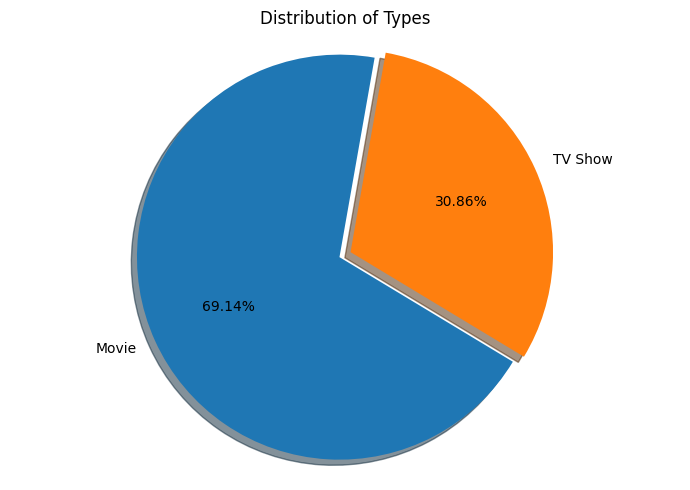

In [36]:
#value_counts for movie and tv shows
type_distribution = df1['type'].value_counts(normalize=True)

#plotting on pie chart
plt.figure(figsize=(7, 5))
plt.pie(type_distribution,labels = type_distribution.index,autopct = '%0.2f%%',startangle=80,shadow=True,explode =(0.01,0.05))
plt.title('Distribution of Types')
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

**Observation:**
*   **From above pie chart we can see that 69.14% movies and 30.86% Tv Shows in our dataset**

### **Top 10 Movie directors**

In [37]:
#fetching top 10 directors with most of the movie
top_directors = movie_df.loc[movie_df['director'] != 'Unknown']['director'].value_counts()[:10]
top_directors

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: director, dtype: int64

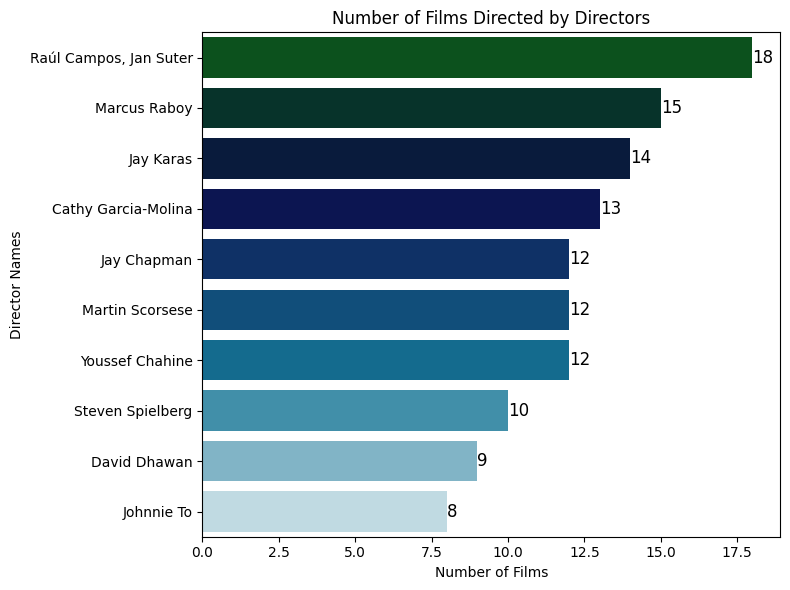

In [38]:
#plotting horizontal barplot of top 10 directors
plt.figure(figsize=(8,6))
sns.barplot(y=top_directors.index,x=top_directors.values,palette = 'ocean')
# Annotate the bars with their values
for i, v in enumerate(top_directors.values):
    plt.text(v, i, str(v), va='center', fontsize=12, color='black')
 # Set labels and title
plt.xlabel('Number of Films')
plt.ylabel('Director Names')
plt.title('Number of Films Directed by Directors')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **Raúl Campos have directed highest movies following Jay Karas,Marcus Raboy, Cathy Garcia-Molina,Jay Chapman,Martin Scorsese,      Youssef Chahine,Steven Spielberg,David Dhawan,Shannon Hartman.**   

### **Top 10 TV Show directors**

In [39]:
#fetching top 10 directors with most of the tv shows
top_tv_show_directors = tv_show_df.loc[tv_show_df['director'] != 'Unknown']['director'].value_counts()[:10]
top_tv_show_directors

Alastair Fothergill           3
Ken Burns                     2
Shin Won-ho                   2
Iginio Straffi                2
Rob Seidenglanz               2
Stan Lathan                   2
Serdar Akar                   1
Jani Lachauer, Jakob Schuh    1
Jalil Lespert                 1
Jay Chandrasekhar             1
Name: director, dtype: int64

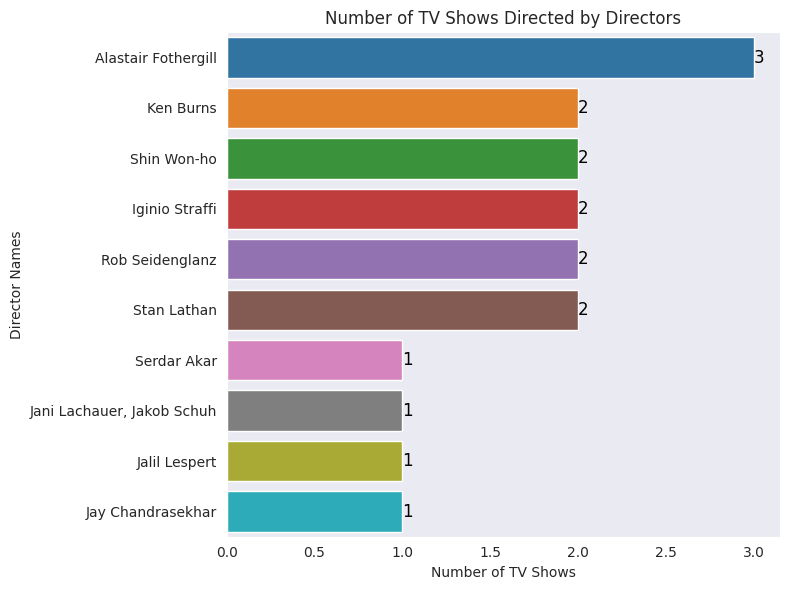

In [40]:
#plotting horizontal barplot of top 10 directors
sns.set_style('dark')
plt.figure(figsize=(8,6))
sns.barplot(y=top_tv_show_directors.index,x=top_tv_show_directors.values,palette = 'tab10')
# Annotate the bars with their values
for i, v in enumerate(top_tv_show_directors.values):
    plt.text(v, i, str(v), va='center', fontsize=12, color='black')
# Set labels and title
plt.xlabel('Number of TV Shows')
plt.ylabel('Director Names')
plt.title('Number of TV Shows Directed by Directors')

# Show the plot
plt.tight_layout()
plt.show()

**observation:**
*   **Ken Burns and Alastair Fothergill have directed highest tv shows following Iginio Straffi,Shin Won-ho,Jung-ah Im etc.**

### **Top Content Creator Countries**

In [41]:
#creating dataframe for all countries with their associated content
country_li = df1['country'].apply(lambda x: str(x).split(', ')).tolist()
countries_df = pd.DataFrame(country_li,index=df1['Content_Category'])
countries_df = countries_df.stack()
countries_df = pd.DataFrame(countries_df.reset_index())
countries_df = countries_df.rename(columns={0:'country'})
countries_df = countries_df.drop(columns='level_1')
top_content_creator_country = countries_df.country.value_counts()[:10]


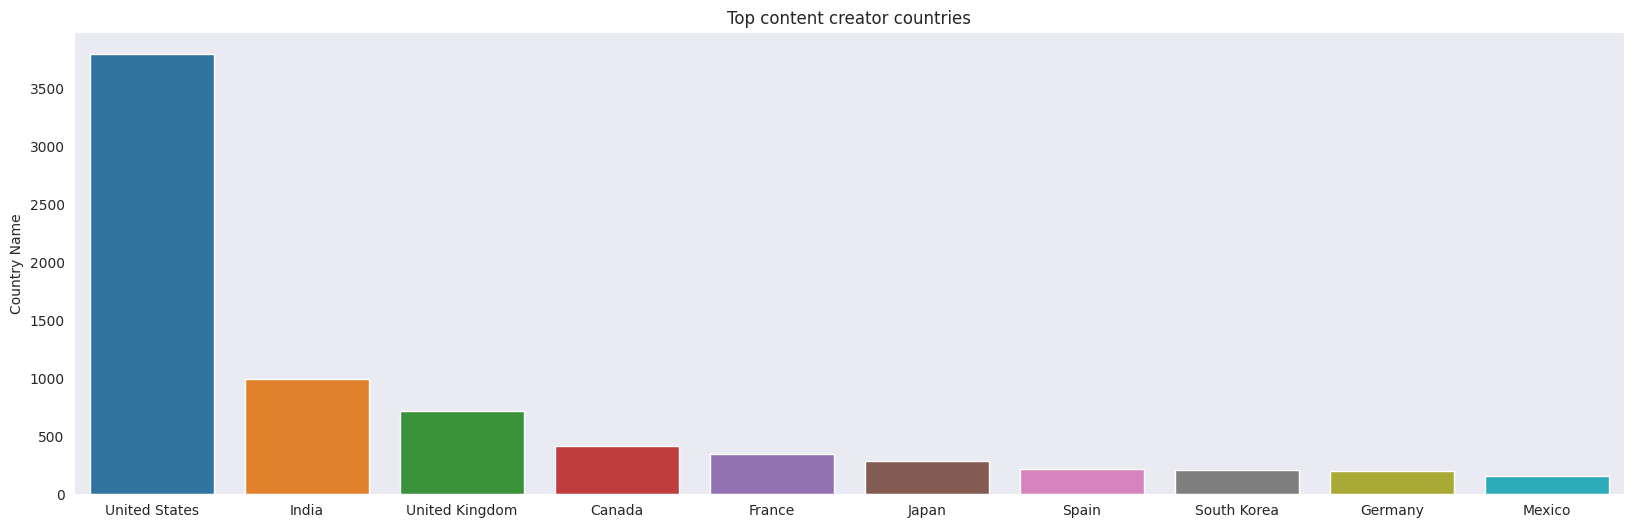

In [42]:
#plotting barplot for top 10 content creator countries
sns.set_style('dark')
plt.figure(figsize=(20,6))
sns.barplot(y = top_content_creator_country.values,x=top_content_creator_country.index,palette='tab10')
plt.title('Top content creator countries')
plt.ylabel('Country Name')
plt.show()


**Observation:**
*   **From graph,United States is the top country producing movie and tv show on Netflix.This suggest that Netflix is heavily influenced by american content.**
*   **India is second top producing country on Netflix indicating growing popularity of bollywood movies and tv shows.**
*   **United kingdom is at third position producing movies and TV Shows following Canada,Japan,France,South Korea,Spain etc.**

### **Top 10 Actors Appeared in Most of the Movies**

In [43]:
#creating dataframe for all movie  actors with their associated movie
movie_actor_list = movie_df['cast'].apply(lambda x: str(x).split(',')).tolist()
movie_actor_df = pd.DataFrame(movie_actor_list,index=movie_df['title'])
movie_actor_df = movie_actor_df.stack()
movie_actor_df = pd.DataFrame(movie_actor_df.reset_index())
movie_actor_df = movie_actor_df.rename(columns={0:'Actors'})
movie_actor_df = movie_actor_df.drop(columns='level_1')


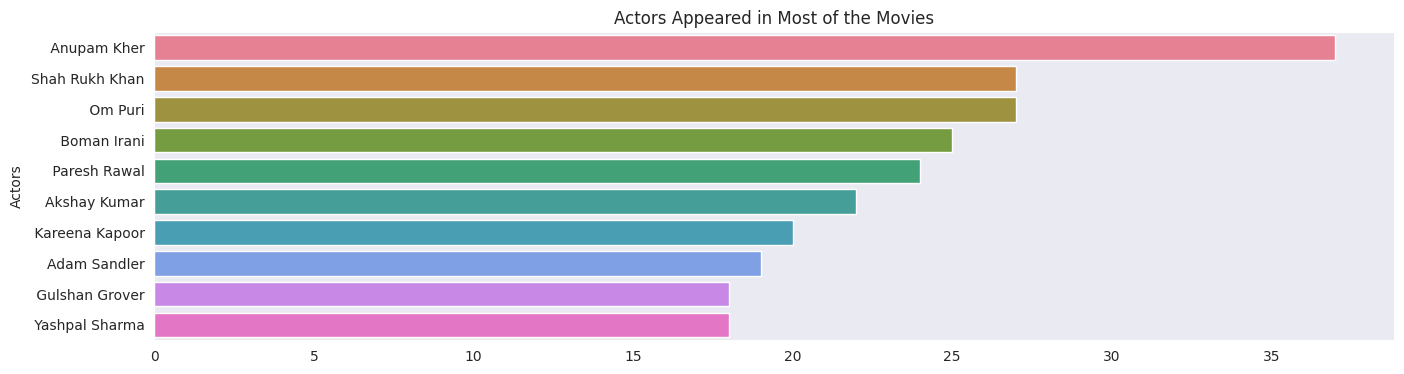

In [44]:
#plotting top 10 actors who appeared in most of the movies
top_10_movie_actor = movie_actor_df.loc[movie_actor_df['Actors'] != 'Unknown']['Actors'].value_counts()[:10]
sns.set_style('dark')
plt.figure(figsize=(16,4))
sns.barplot(y=top_10_movie_actor.index,x=top_10_movie_actor.values,palette='husl')
plt.title('Actors Appeared in Most of the Movies')
plt.ylabel('Actors')
plt.show()

**Observation:**
*   **Anupam kher has appeared in highest number of the movies following Shah Rukh Khan,Om Puri,Boman Irani and so on.**
*   **Most of the actors are from Bollywood.**

### **Top 10  Actors Appeared in Most of the TV Show**

In [45]:
#creating dataframe for all tv show actors with their associated movie
tv_actor_list = tv_show_df['cast'].apply(lambda x: str(x).split(',')).tolist()
tv_actor_df = pd.DataFrame(tv_actor_list,index=tv_show_df['title'])
tv_actor_df = tv_actor_df.stack()
tv_actor_df = pd.DataFrame(tv_actor_df.reset_index())
tv_actor_df = tv_actor_df.rename(columns={0:'Actors'})
tv_actor_df = tv_actor_df.drop(columns='level_1')


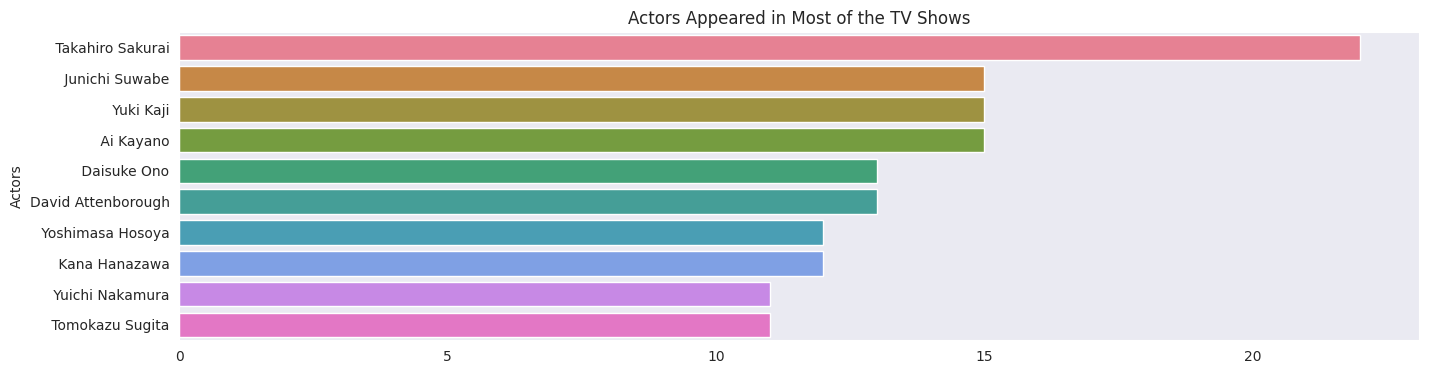

In [46]:
#plotting top 10 actors who appeared in most of the movies
top_10_tv_actor = tv_actor_df.loc[tv_actor_df['Actors'] != 'Unknown']['Actors'].value_counts()[:10]
sns.set_style('dark')
plt.figure(figsize=(16,4))
sns.barplot(y=top_10_tv_actor.index,x=top_10_tv_actor.values,palette='husl')
plt.title('Actors Appeared in Most of the TV Shows')
plt.ylabel('Actors')
plt.show()

**Observation:**

*   **Takahiro sakurai has appeared in most of the TV Shows following Junichi Suwabe,Yuki kaji and so on.**
*   **Most of the top actors who appeared in most of the TV Shows are from south Korea.**
*   **No Bollywood top actors appeared in TV Show.**

### **TV Show & Movie wise distribution**

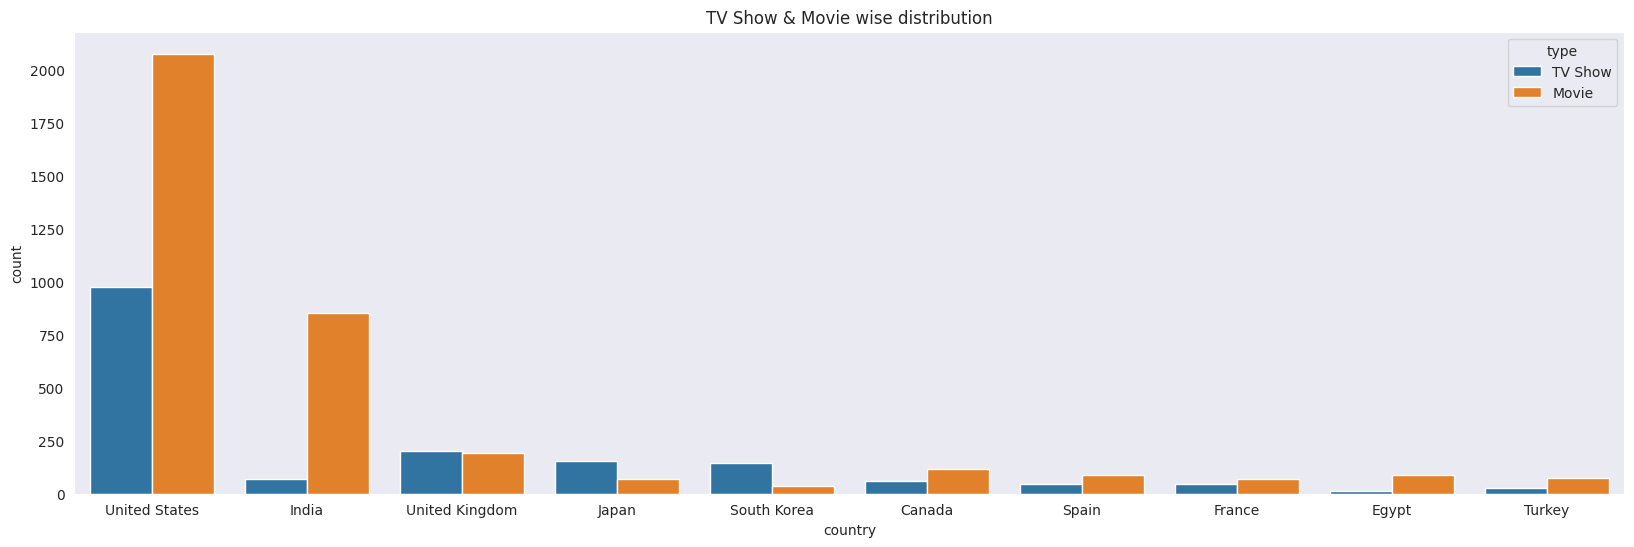

In [47]:
#plotting TV Show & Movie wise distribution
plt.figure(figsize=(20,6))
sns.countplot(data=df1,x='country',hue='type',order=df1['country'].value_counts()[:10].index)
plt.title('TV Show & Movie wise distribution')
plt.show()

**Observation:**
*   **United States produces highest number of movies and TV Shows.**
*   **India produces second highest number of movies.India produces less TV Show in compare to movies.**
*   **United Kingdom produces second highest number of TV Shows and third highest number of movies.**
*   **Japan and South Korea produces more TV Shows than movies.**

### **Most Popular Genres of the movies**

In [48]:
#creating dataframe for all movie  genres with their associated movie
genres_list = movie_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
genres_df = pd.DataFrame(genres_list,index=movie_df['title'])
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df.reset_index())
genres_df = genres_df.rename(columns={0:'Genres'})
genres_df = genres_df.drop(columns='level_1')


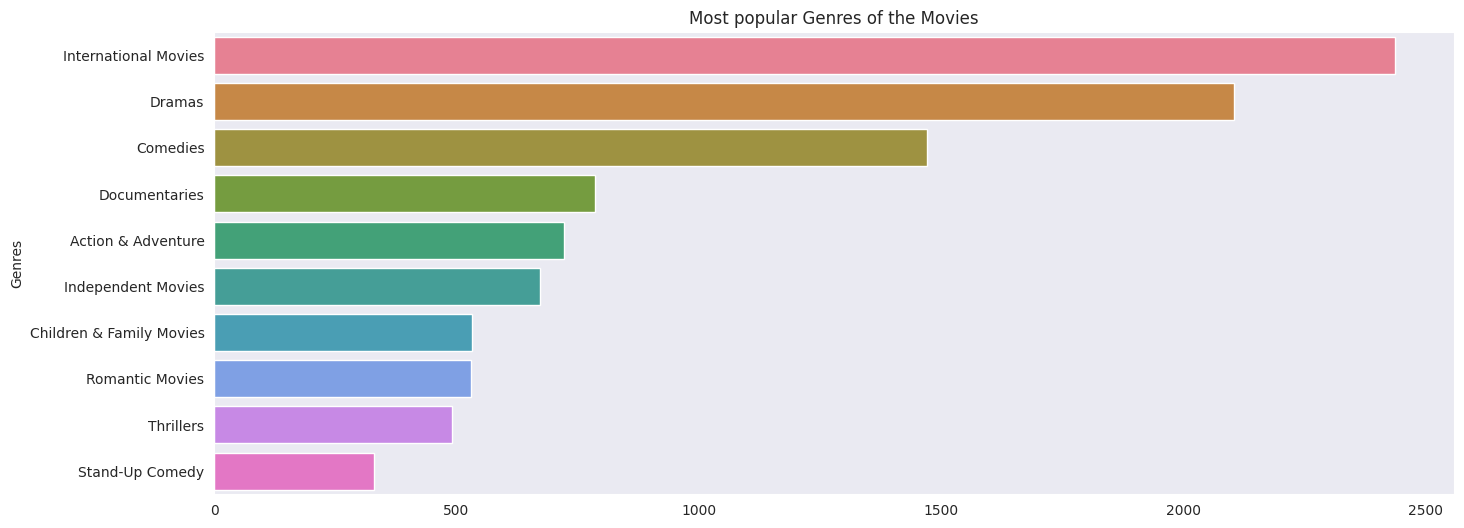

In [49]:
#plotting top 10 genres of the movies
sns.set_style('dark')
plt.figure(figsize=(16,6))
sns.barplot(data=genres_df,y=genres_df['Genres'].value_counts().index[:10],x=genres_df['Genres'].value_counts().values[:10],palette='husl')
plt.title('Most popular Genres of the Movies')
plt.ylabel('Genres')
plt.show()

**Observation:**
*  **Most popular Genre for movies is International Movie following drama,comedy,documentary,action & adventures and so on.**

### **Most Popular Genres of the TV Shows**

In [50]:
#creating dataframe for all movie  genres with their associated movie
tv_genres_list = tv_show_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
tv_genres_df = pd.DataFrame(tv_genres_list,index=tv_show_df['title'])
tv_genres_df = tv_genres_df.stack()
tv_genres_df = pd.DataFrame(tv_genres_df.reset_index())
tv_genres_df = tv_genres_df.rename(columns={0:'Genres'})
tv_genres_df = tv_genres_df.drop(columns='level_1')

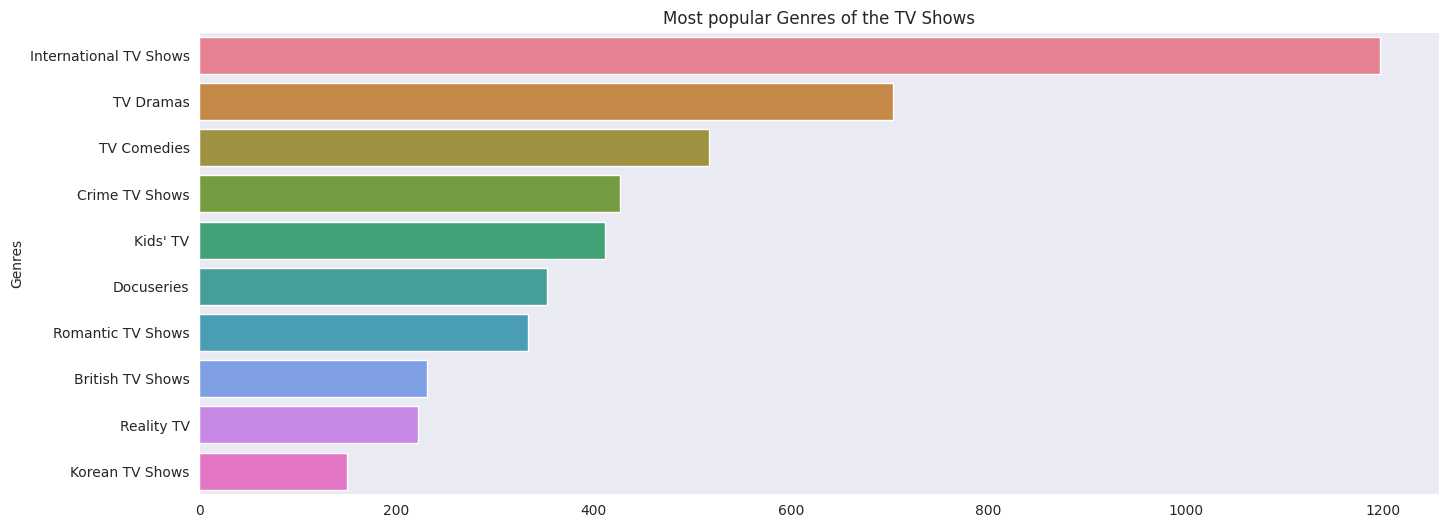

In [51]:
#plotting top 10 genres of the movies
sns.set_style('dark')
plt.figure(figsize=(16,6))
sns.barplot(data=tv_genres_df,y=tv_genres_df['Genres'].value_counts().index[:10],x=tv_genres_df['Genres'].value_counts().values[:10],palette='husl')
plt.title('Most popular Genres of the TV Shows')
plt.ylabel('Genres')
plt.show()

**Observation:**
*   **Most popular genre for TV Show is International TV Shows following drama,comedy,crime and so on.**

### **Number of Movies Released per Year**

<Figure size 800x600 with 0 Axes>

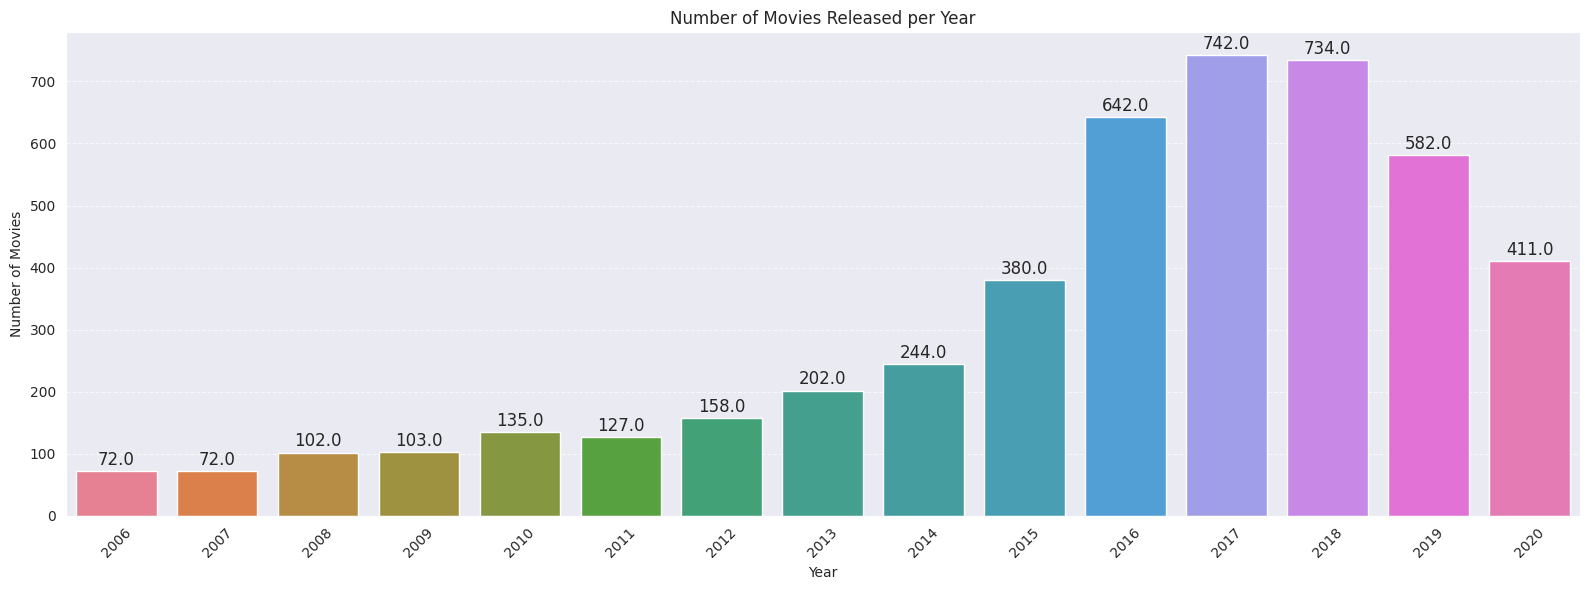

In [52]:
#creating dataframe of movies release per year
plt.figure(figsize=(8,6))
movie_release_per_year = movie_df['release_year'].value_counts().reset_index().rename(columns={'index':'year','release_year':'total_movie'})[:15]


# Creating a bar plot
plt.figure(figsize=(16, 6))
movie_release_per_year = movie_df['release_year'].value_counts().reset_index().rename(columns={'index':'year','release_year':'total_movie'})[:15]
plots = sns.barplot(data=movie_release_per_year, x='year', y='total_movie',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **Over the years,number of movies increasing and new movies are coming.We can see from graph how much amount of movies releasing per year.**
*   **But since 2019,less movies have been released.it may be due to pendemic effect or may be people are less interested in movies now.**


### **Number of TV Shows Released per Year**

<Figure size 800x600 with 0 Axes>

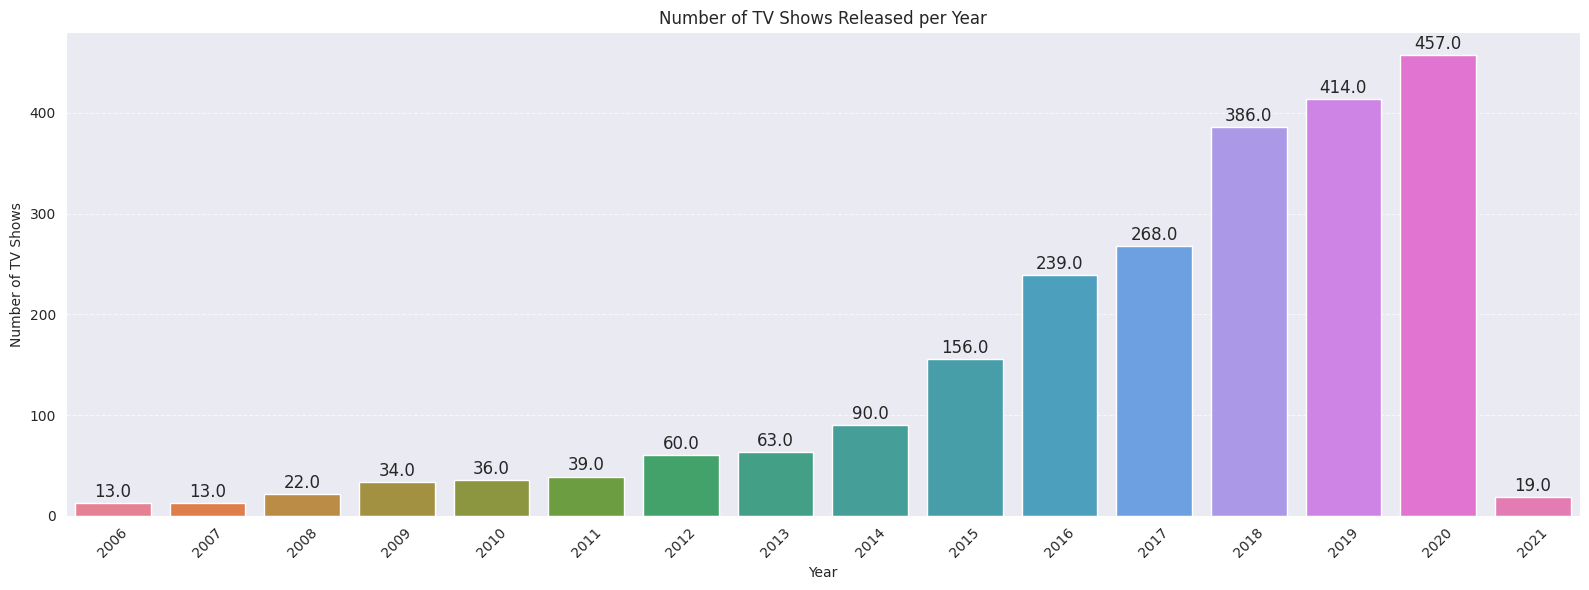

In [53]:
#creating dataframe of tv shows release per year
plt.figure(figsize=(8,6))
tv_show_release_per_year = tv_show_df['release_year'].value_counts().reset_index().rename(columns={'index':'year','release_year':'total_tv_show'})[:16]


# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=tv_show_release_per_year, x='year', y='total_tv_show',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **Number of TV Shows have been increased drastically over the few years which indicates people are interested  to see TV Shows than movies.**
*  **In 2021,very less TV Shows released may be due to pendemic reason.**

### **Number of movies added to Netflix per Year**

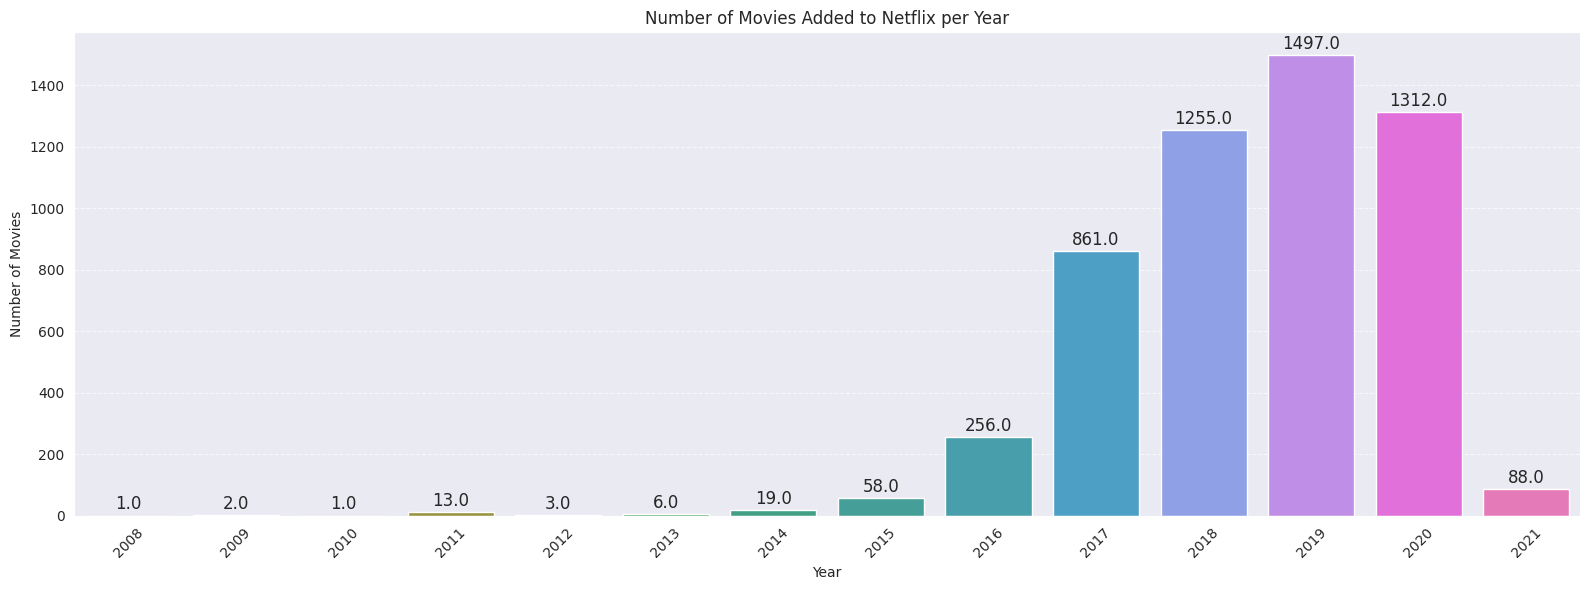

In [54]:
#creating dataframe of movies added to Netflix per year
movie_added_per_year = movie_df['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'total_movie'})[:15]

# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=movie_added_per_year, x='year', y='total_movie',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Added to Netflix per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*  **Number of movies added to Netflix has been increased drastically since 2015.**
*   **From 2020 number of movies released on Netflix decreasing and in 2021,very less movies are released on Netflix.**


### **Number of TV Shows added to Netflix per Year**

<Figure size 800x600 with 0 Axes>

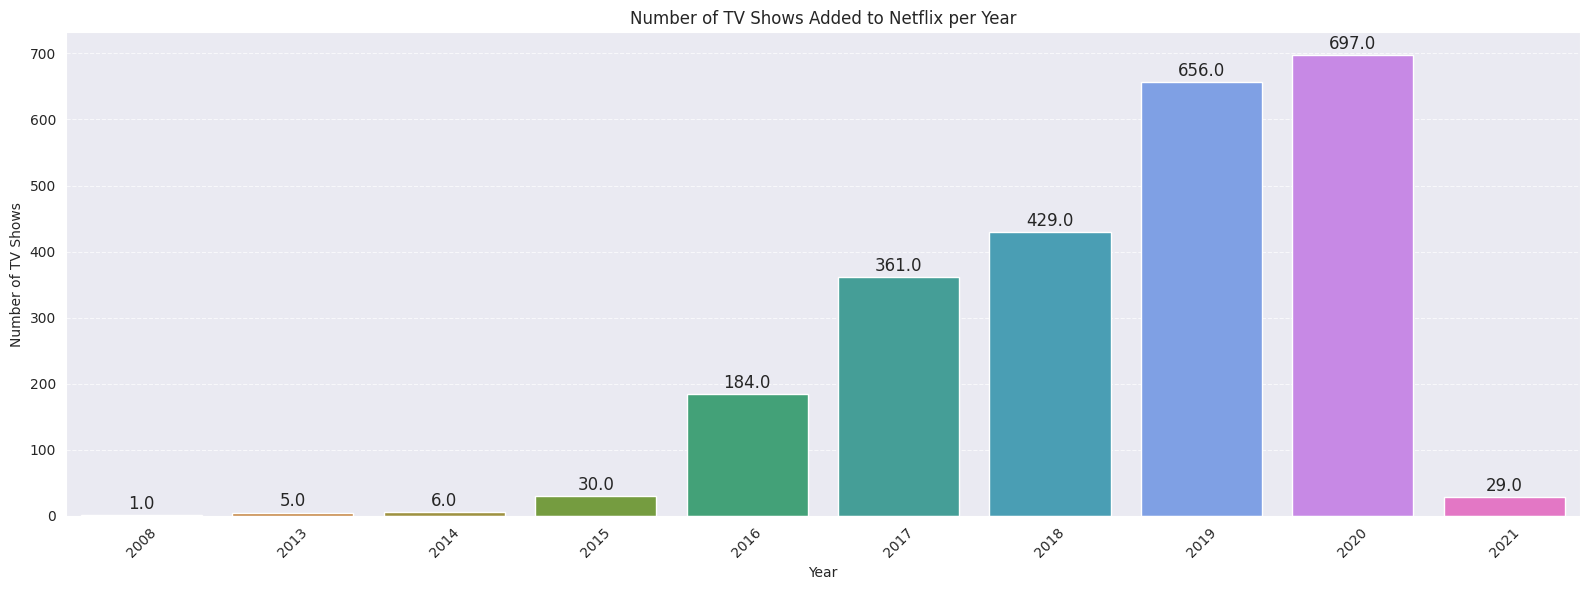

In [55]:
#creating dataframe of TV shows added to Netflix per year
plt.figure(figsize=(8,6))
tv_show_added_per_year = tv_show_df['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'total_tv_show'})[:15]


# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=tv_show_added_per_year, x='year', y='total_tv_show',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Added to Netflix per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **Number of TV Shows added to Netflix has been increased over the years.**
*   **since 2015,number of TV show released on Netflix has been increased drastically but in 2021 very less TV Show has been released may be due to pandemic.**

### **Number of Movies Added to Netflix per Month**

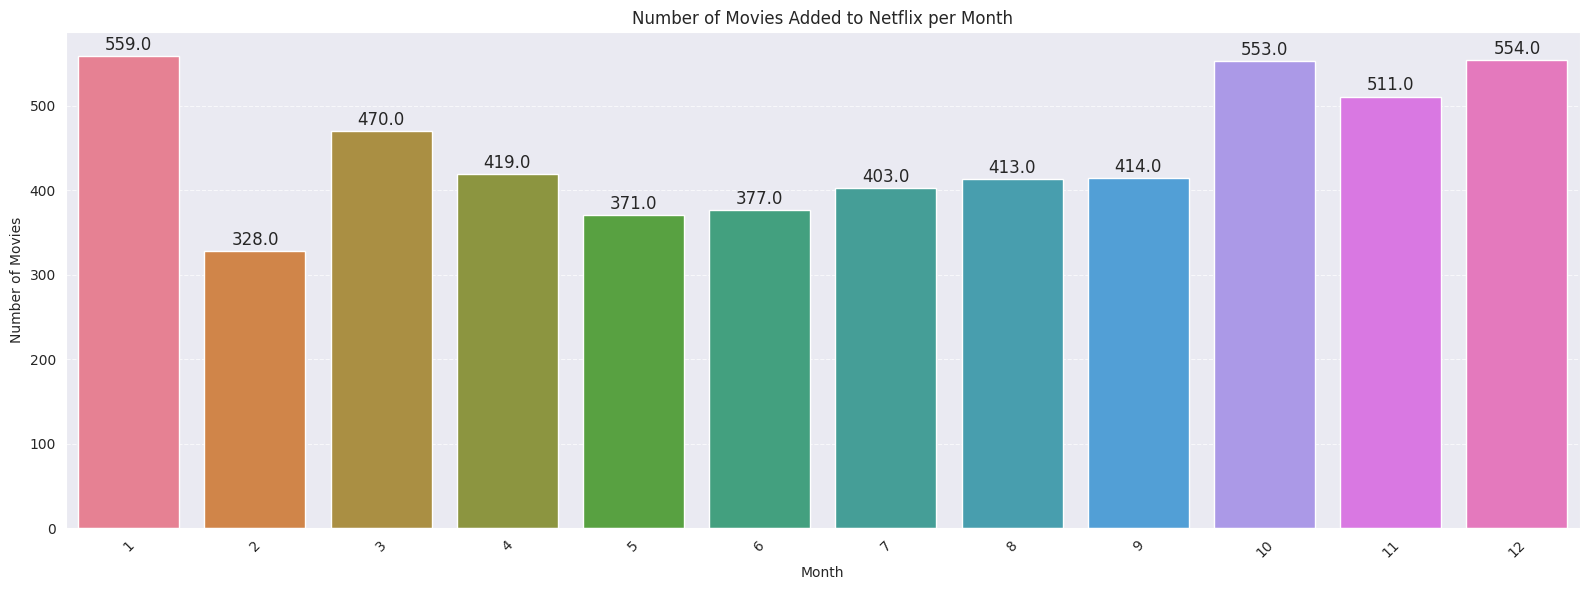

In [56]:
#creating dataframe of movies added to Netflix per month
movie_added_per_month = movie_df['month_added'].value_counts().reset_index().rename(columns={'index':'month','month_added':'total_movie'})[:15]

# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=movie_added_per_month, x='month', y='total_movie',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Added to Netflix per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **October,December and January are popular months for addition of movies on Netflix.**
*   **February is very least popular month for the movies to be added on Netflix.**

### **Number of TV Show Added to Netflix per Month**

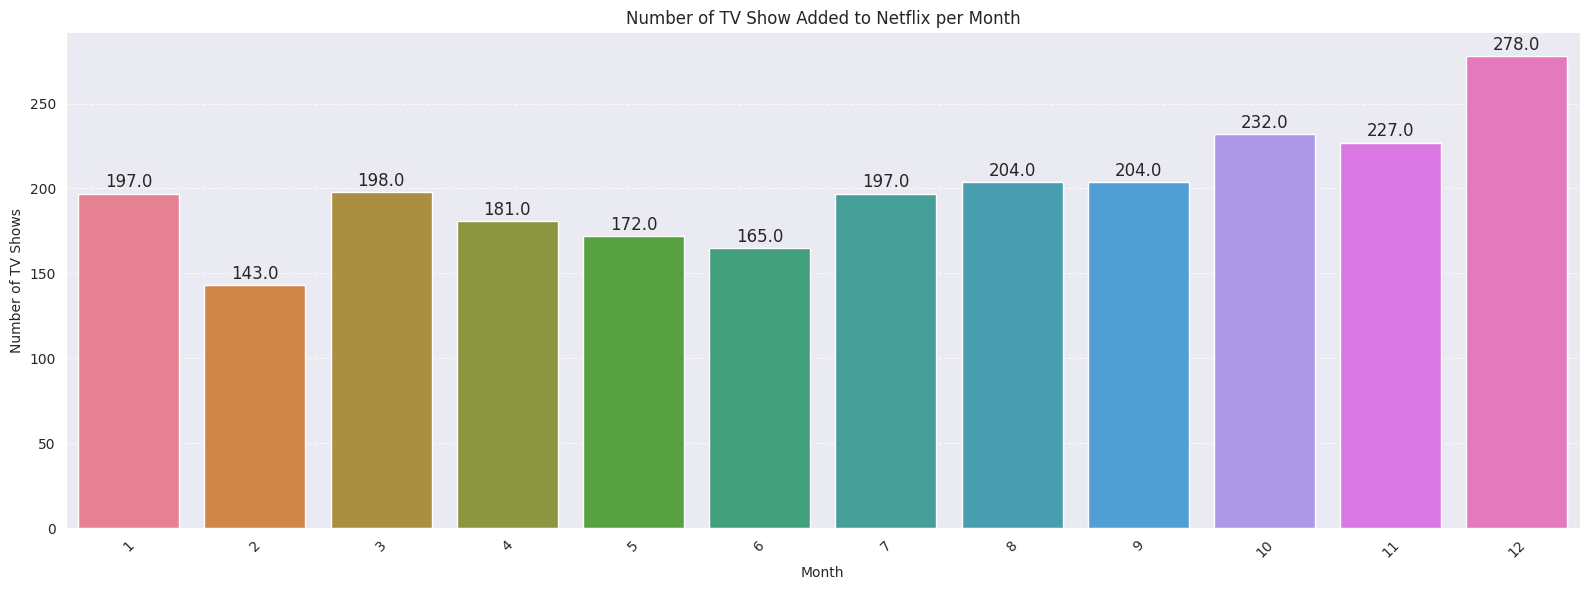

In [57]:
#creating dataframe of tv show added to Netflix per month
tv_show_added_per_month = tv_show_df['month_added'].value_counts().reset_index().rename(columns={'index':'month','month_added':'total_tv_show'})[:15]

# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=tv_show_added_per_month, x='month', y='total_tv_show',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Show Added to Netflix per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **October,November and December are the most popular months for TV Shows addition on Netflix.**
*   **February is very least popular month for TV Shows to be added on Netflix.**

### **Number of Movies Added to Netflix per Day**

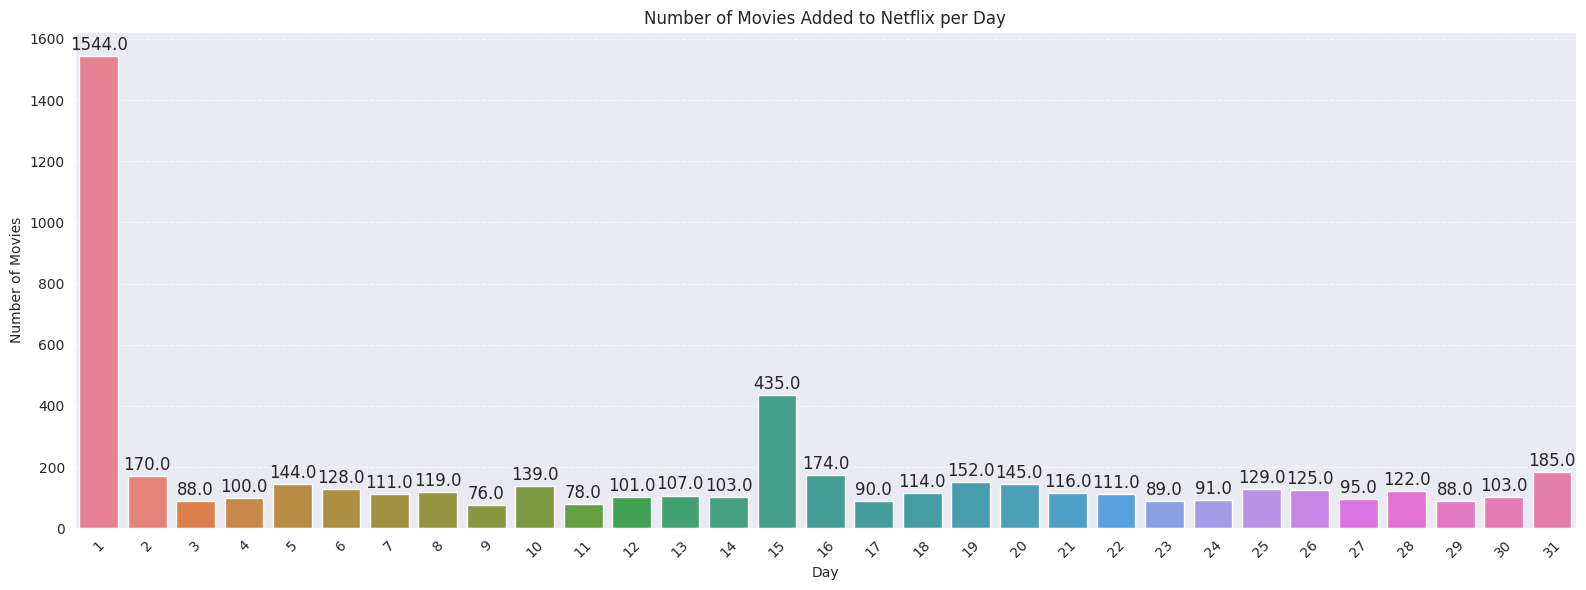

In [58]:
#creating dataframe of movies added to Netflix per day
movie_added_per_day = movie_df['day_added'].value_counts().reset_index().rename(columns={'index':'day','day_added':'total_movie'})

# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=movie_added_per_day, x='day', y='total_movie',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Day')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Added to Netflix per Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **From above graph,we can observed that most of the movies added at the begining and at the middle of the month.**
*   **It could be because people tend to have more free time after getting paid at the begining of the month and releasing new content at the begining and at the middle of the month can increase viewership.**

### **Number of TV Shows Added to Netflix per Day**

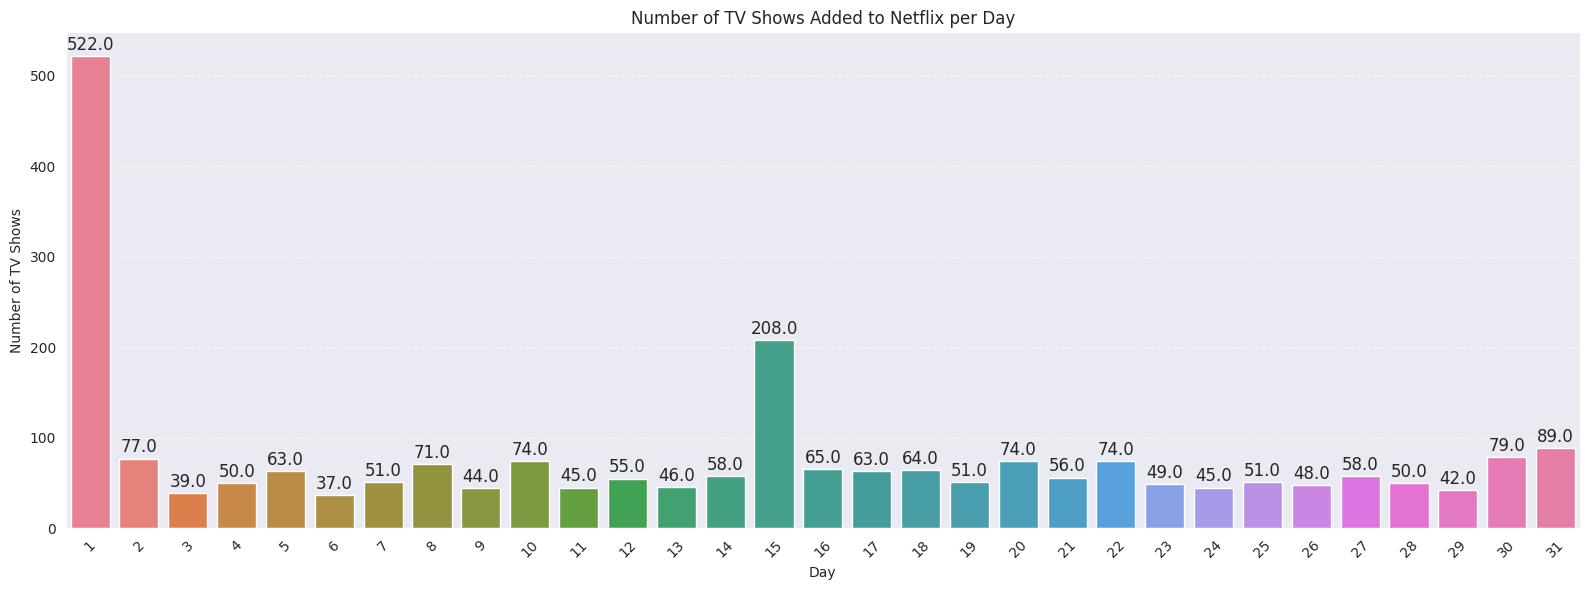

In [59]:
#creating dataframe of movies added to Netflix per day
tv_show_added_per_day = tv_show_df['day_added'].value_counts().reset_index().rename(columns={'index':'day','day_added':'total_tv_shows'})

# Creating a bar plot
plt.figure(figsize=(16, 6))
plots = sns.barplot(data=tv_show_added_per_day, x='day', y='total_tv_shows',palette='husl')

# Adding annotations to each bar
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

# Customizing the plot
plt.xlabel('Day')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Added to Netflix per Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

**Observation:**
*   **From above graph,like movies, most of the Tv shows added at the begining and at the middle of the month.**
*   **It could be because people tend to have more free time after getting paid at the begining of the month and releasing new content at the begining and at the middle of the month can increase viewership.**

### **Correlation Heatmap**

In [60]:
#creating dataframe for all countries with their associated content
country_list = df1['country'].apply(lambda x: str(x).split(', ')).tolist()
country_df = pd.DataFrame(country_list,index=df1['Content_Category'])
country_df = country_df.stack()
country_df = pd.DataFrame(country_df.reset_index())
country_df = country_df.rename(columns={0:'country'})
country_df = country_df.drop(columns='level_1')

#making top 10 country dataframe
top_10 = country_df['country'].value_counts()[:10].index.to_list()
top_10_country_df = pd.DataFrame(top_10,columns=['country'])

#merging dataframes
top_content_country = pd.merge(country_df, top_10_country_df, on = 'country' )

In [61]:
#grouping by country with content_category
total_content_df = top_content_country.groupby(['country','Content_Category'])['Content_Category'].count().reset_index(name='Total_Content')
cross_tab = pd.crosstab(total_content_df['country'],total_content_df['Content_Category'],values=total_content_df['Total_Content'],aggfunc='sum',normalize='index')


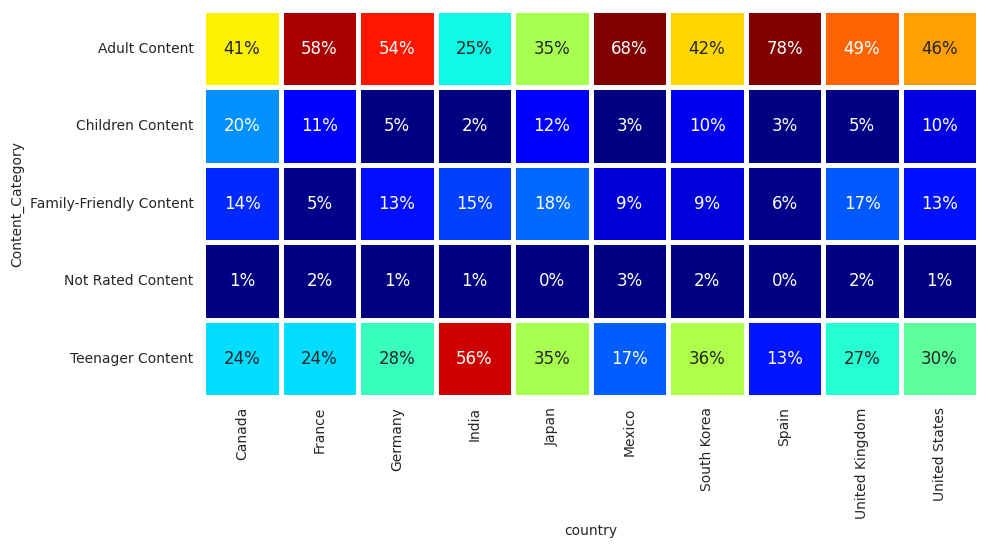

In [62]:
#plotting heatmap of crosstab
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(cross_tab.T, cmap="jet", square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05,ax=ax, annot_kws={"fontsize": 12})
plt.show()

**Observation:**
*   **Spain produces highest adult contents following Maxico,France,Germany,United Kingdom and United States and so on.**
*   **Among all countries,India produces very less adult content.**
*   **Canada produces highest children content following France,South Korea and so on.**
*   **Japan produces highest Family-Freindly content following United Kingdom. India, Canada and so on.**
*   **India produces highest teenager content following South Korea,Japan and so on.**

# **Hypothesis Testing**

*   The statistical test we will use to obtain the P-value is the z-test for proportions.

*   The z-test for proportions is chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### **Hypothetical Statement :**

**Null Hypothesis:** There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis:** There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

In [63]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df1[df1['listed_in'].str.contains('Dramas') | df1['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  17.896232939230682
p-value:  1.261731509595717e-71
Reject the null hypothesis.


**Conclusion:**

**We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.**






# **Feature Engineering and Text Preprocessing**

In [70]:
#making copy of df1
netflix_movies = df1.copy()

In [71]:
netflix_movies['director'] = netflix_movies['director'].str.replace(" ", "").str.replace("-", "").str.replace(".", "")
netflix_movies['cast'] = netflix_movies['cast'].str.replace(" ", "").str.replace("-", "").str.replace(".", "")
netflix_movies['genres'] = netflix_movies['listed_in'].str.replace(" ", "").str.replace("-", "").str.replace(".", "")
netflix_movies['description'] = netflix_movies['description'].str.replace("-", "").str.replace("—","")

<ipython-input-71-f44ba1d740d3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix_movies['director'] = netflix_movies['director'].str.replace(" ", "").str.replace("-", "").str.replace(".", "")
<ipython-input-71-f44ba1d740d3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix_movies['cast'] = netflix_movies['cast'].str.replace(" ", "").str.replace("-", "").str.replace(".", "")
<ipython-input-71-f44ba1d740d3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix_movies['genres'] = netflix_movies['listed_in'

In [72]:
netflix_movies['tags'] = netflix_movies['director'] + ' ' + netflix_movies['cast'] + ' ' + netflix_movies['country'] + ' ' + netflix_movies['genres'] + ' ' + netflix_movies['description']


In [73]:
netflix_movies['tags'][4]

'RobertLuketic JimSturgess,KevinSpacey,KateBosworth,AaronYoo,LizaLapira,JacobPitts,LaurenceFishburne,JackMcGee,JoshGad,SamGolzari,HelenCarey,JackGilpin United States Dramas A brilliant group of students become cardcounting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.'

In [74]:
netflix_movies.head()

type  title         director  \
0  TV Show     3%          Unknown   
1    Movie   7:19  JorgeMichelGrau   
2    Movie  23:59      GilbertChan   
3    Movie      9       ShaneAcker   
4    Movie     21    RobertLuketic   

                                                cast        country  \
0  JoãoMiguel,BiancaComparato,MichelGomes,Rodolfo...         Brazil   
1  DemiánBichir,HéctorBonilla,OscarSerrano,Azalia...         Mexico   
2  TeddChan,StellaChung,HenleyHii,LawrenceKoh,Tom...      Singapore   
3  ElijahWood,JohnCReilly,JenniferConnelly,Christ...  United States   
4  JimSturgess,KevinSpacey,KateBosworth,AaronYoo,...  United States   

   release_year  duration                                          listed_in  \
0          2020         4  International TV Shows, TV Dramas, TV Sci-Fi &...   
1          2016        93                       Dramas, International Movies   
2          2011        78                Horror Movies, International Movies   
3          2009        80  Action & Adventure, Independent Movies, Sci-Fi...   
4          2008       123                                             Dramas   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  After a devastating earthquake hits Mexico Cit...         23           12   
2  When an army recruit is found dead, his fellow...         20           12   
3  In a postapocalyptic world, ragdoll robots hid...         16           11   
4  A brilliant group of students become cardcount...          1            1   

   year_added  Content_Category  \
0        2020     Adult Content   
1        2016     Adult Content   
2        2018     Adult Content   
3        2017  Teenager Content   
4        2020  Teenager Content   

                                             genres  \
0     InternationalTVShows,TVDramas,TVSciFi&Fantasy   
1                        Dramas,InternationalMovies   
2                  HorrorMovies,InternationalMovies   
3  Action&Adventure,IndependentMovies,SciFi&Fantasy   
4                                            Dramas   

                                                tags  
0  Unknown JoãoMiguel,BiancaComparato,MichelGomes...  
1  JorgeMichelGrau DemiánBichir,HéctorBonilla,Osc...  
2  GilbertChan TeddChan,StellaChung,HenleyHii,Law...  
3  ShaneAcker ElijahWood,JohnCReilly,JenniferConn...  
4  RobertLuketic JimSturgess,KevinSpacey,KateBosw...

In [75]:
#importing important libraries for text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [76]:
#lowercasing
netflix_movies['tags'] = netflix_movies['tags'].str.lower()

In [77]:
#remove html tags
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

netflix_movies['tags'] = netflix_movies['tags'].apply(remove_html_tags)

In [78]:
#remove URLs
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)
netflix_movies['tags'] = netflix_movies['tags'].apply(remove_url)

In [79]:
# Replacing the digits with one space
def remove_digits_with_one_space(text):

  text = re.sub('[^a-zA-Z]', ' ', text)
  return text

netflix_movies['tags'] = netflix_movies['tags'].apply(remove_digits_with_one_space)

In [80]:
#remove puctuations
exclude = string.punctuation
def remove_punc(text):
  text = text.replace(',',' ')
  new_text =  text.translate(str.maketrans('','',exclude))
  return new_text

netflix_movies['tags'] = netflix_movies['tags'].apply(remove_punc)

In [81]:
#downloading stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [82]:
#displaying english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'too', "wasn't", "you're", 'who', 'wasn', 'its', "won't", "should've", 'myself', 'our', 'once', 'than', 'himself', "don't", 'a', 'off', 'mightn', 'can', 'how', 'before', 'again', 'out', 'your', 'for', 'both', 'of', 'with', 'my', 'while', 'into', 'here', 'because', 'most', 'and', 'which', 'just', 'during', "doesn't", 'it', "mightn't", 'no', 'there', 'or', 'above', 'the', 'to', 'own', 'd', 'doesn', 'herself', "haven't", 's', "you've", 'this', 'you', 'hers', 'where', 'up', 'what', 'at', 'hasn', "isn't", 'are', 'any', 'shan', 'i', 'their', 'll', 'not', 'on', 'shouldn', 'ain', 't', "that'll", 'were', "she's", 'until', 'from', 'couldn', 'her', 'they', "wouldn't", "you'd", 'hadn', 'yourself', 'doing', "shan't", 'am', 'all', 'that', 'as', "you'll", 'he', 'ours', "couldn't", 'haven', 've', 'nor', 're', 'those', 'didn', "needn't", 'o', 'theirs', 'is', "hadn't", 'themselves', 'then', "mustn't", 'will', 'needn', 'weren', 'do', 'had', "hasn't", "it's", 'down', 'some', 'when', 'having', 'won', 'the

In [83]:
#remove stopwords
def remove_stopwords(text):
  new_text = [word for word in text.split() if not word in stop_words]
  new_text =  ' '.join(new_text)
  return new_text

netflix_movies['tags'] = netflix_movies['tags'].apply(remove_stopwords)

In [84]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [85]:
#tokenization
netflix_movies['tags'] = netflix_movies['tags'].apply(word_tokenize)

In [86]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [87]:
ps = PorterStemmer()

#creating function for stemming
def stemming_sent(text):
  stemming_text = [ps.stem(word) for word in text]

  return ' '.join(stemming_text)

netflix_movies['tags'] = netflix_movies['tags'].apply(stemming_sent)

In [88]:
#text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
vectors = tfidf_vectorizer.fit_transform(netflix_movies['tags'])

In [89]:
#shape of vector
vectors.shape

(7770, 30000)

In [90]:
#checking first 100 words
print(tfidf_vectorizer.get_feature_names_out()[:100])

['aadarshbalakrishna' 'aaditipohankar' 'aahanakumra' 'aakashdabhad'
 'aamir' 'aamirbashir' 'aamirkhan' 'aanandrai' 'aaron' 'aaronabram'
 'aaronburn' 'aarondougla' 'aaroneckhart' 'aaronhimelstein'
 'aaronjakubenko' 'aaronjefferi' 'aaronlmcgrath' 'aaronmarsden'
 'aaronmccusk' 'aaronmoorhead' 'aaronpaul' 'aaronsorkin' 'aaronstanford'
 'aarontaylorjohnson' 'aaronyan' 'aaronyoo' 'aashishchaudhari'
 'aasifmandvi' 'aaura' 'aayammehta' 'abalar' 'abandon'
 'abbasalibhaiburmawalla' 'abbatmakama' 'abbey' 'abbiecornish'
 'abbijacobson' 'abbydonnelli' 'abbytrott' 'abdalahmishrif'
 'abdallamahmoud' 'abdelazizn' 'abdelilahwahbi' 'abduct' 'abductor'
 'abdulhussainabdulredah' 'abdullahalhamiri' 'abdullahalramsi'
 'abdullahalturkumani' 'abdulmohsenalqaffa' 'abdurrahmanarif' 'abelayala'
 'abelferrara' 'abelfolk' 'abern' 'abhaydeol' 'abhaymahajan' 'abhijitpans'
 'abhimanyusingh' 'abhinaydeo' 'abhishekbachchan' 'abhishekbanerje'
 'abhishekchaubey' 'abhishekkapoor' 'abhisheksharma' 'abigailbreslin'
 'abigai

*   **We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation**

# **Dimensionality Reduction**

*   **In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.**

In [91]:
#importing pca
from sklearn.decomposition import PCA

#making object of pca
pca = PCA()

#fitting pca
pca.fit(vectors.toarray())


PCA()

In [92]:
#percentage of variance captured by each component
variance_explained = pca.explained_variance_ratio_
variance_explained

array([4.98032714e-03, 4.12875510e-03, 3.15556307e-03, ...,
       2.20502645e-36, 1.13716197e-36, 8.93123266e-37])

In [93]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.00498033, 0.00910908, 0.01226465, ..., 1.        , 1.        ,
       1.        ])

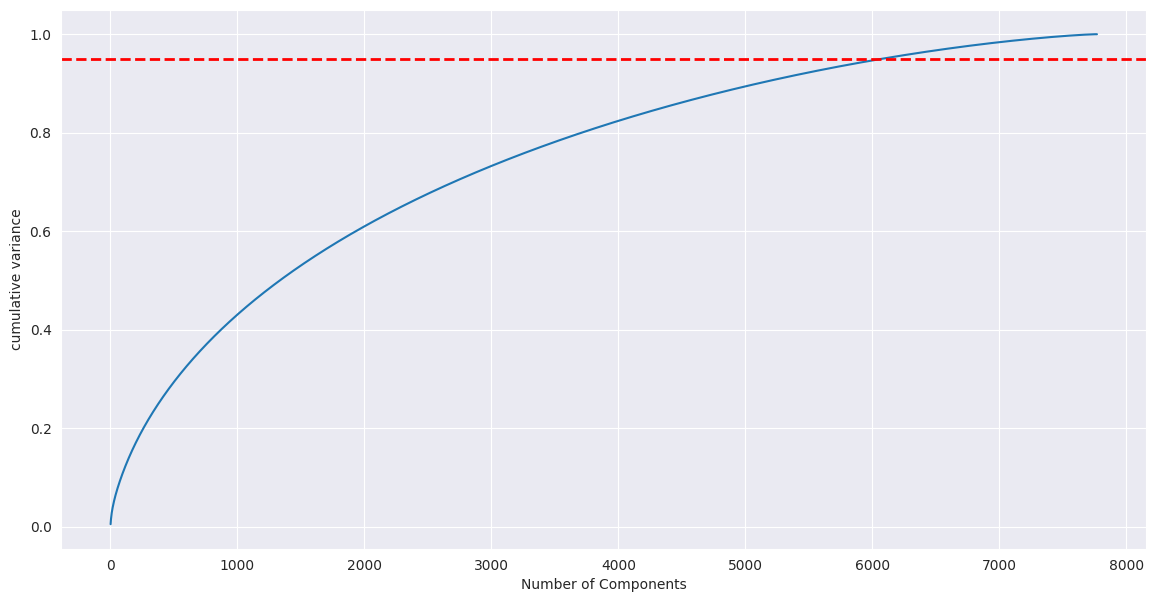

In [94]:
plt.figure(figsize=(14,7))
plt.plot(range(1,vectors.shape[0]+1),cumulative_variance)
plt.axhline(y=0.95,color='r',linestyle='--',linewidth=2,label='95% explained variance')
plt.xlabel('Number of Components')
plt.ylabel('cumulative variance')
plt.grid()
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. We can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide us in choosing the appropriate number of components for your analysis.**

In [95]:
#making object of pca
pca_tuned = PCA(n_components=0.95)

# Fit the PCA model on the input data, vectors, which is converted to a dense array
pca_tuned.fit(vectors.toarray())

# Transform the input data, vectors, to its reduced dimensional representation
vectors_transformed = pca_tuned.transform(vectors.toarray())

In [96]:
#checking shape of vectors_transformed
vectors_transformed.shape

(7770, 6074)

*   **Here,6074 components explained 95% variance.**

In [97]:
vectors_transformed

array([[ 2.27047413e-02, -5.31352875e-02,  4.30293076e-02, ...,
         6.07917885e-03, -1.74440974e-03,  1.82844264e-03],
       [-5.83951378e-02, -2.52797738e-04,  7.68687248e-03, ...,
         1.02249552e-02,  9.90444651e-03,  8.77846400e-03],
       [-4.72904654e-02, -1.70338970e-02, -7.95273772e-03, ...,
        -1.77027824e-03, -1.57448567e-02, -3.17298127e-03],
       ...,
       [ 1.01346944e-01,  3.35467316e-01,  8.60055032e-02, ...,
         5.07980372e-03,  3.63533967e-03,  1.21336543e-02],
       [ 5.68618190e-02, -4.90411900e-02,  5.42451118e-02, ...,
         4.56897942e-03, -1.45511026e-02,  6.35742235e-04],
       [ 1.77287106e-01,  3.80650079e-01,  4.10208373e-02, ...,
         4.43894144e-03, -4.33723445e-04, -1.94358701e-03]])

*   **We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.**

*   **PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.**

*   **PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.**

# **ML Model Implementation**

## **Kmeans clustering**

In [98]:
#importing kmeans
from sklearn.cluster import KMeans

In [99]:
wcss = []
for i in range(1,16):
  kmeans = KMeans(n_clusters=i,n_init=10)
  kmeans.fit_predict(vectors_transformed)
  wcss.append(kmeans.inertia_)

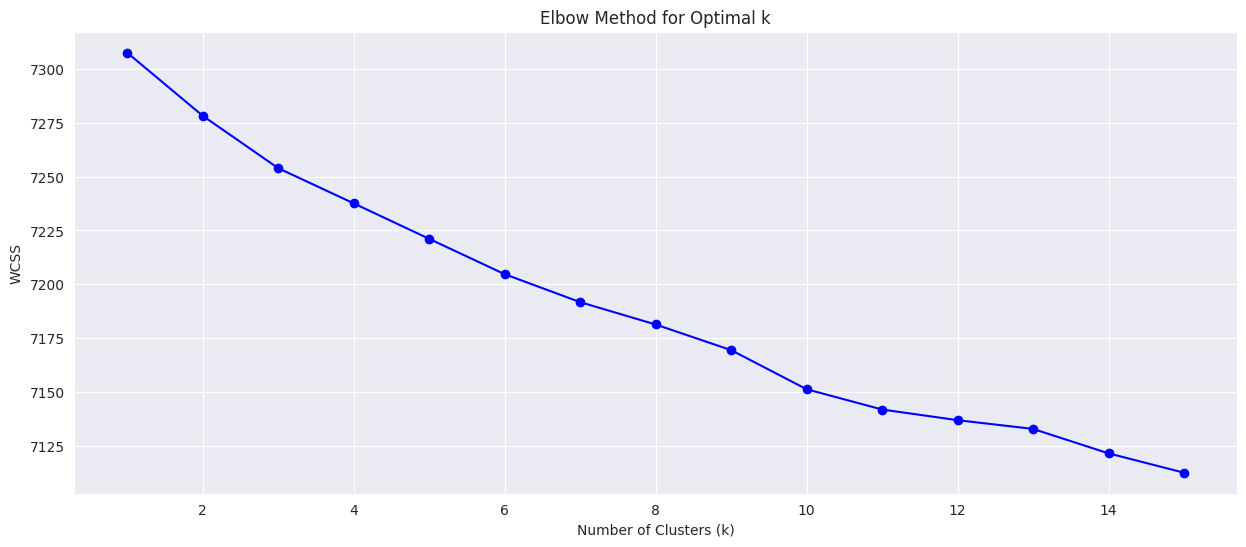

In [100]:
# Plot the elbow curve with multiple elbows
plt.figure(figsize=(15, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### **The silhouette score**

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

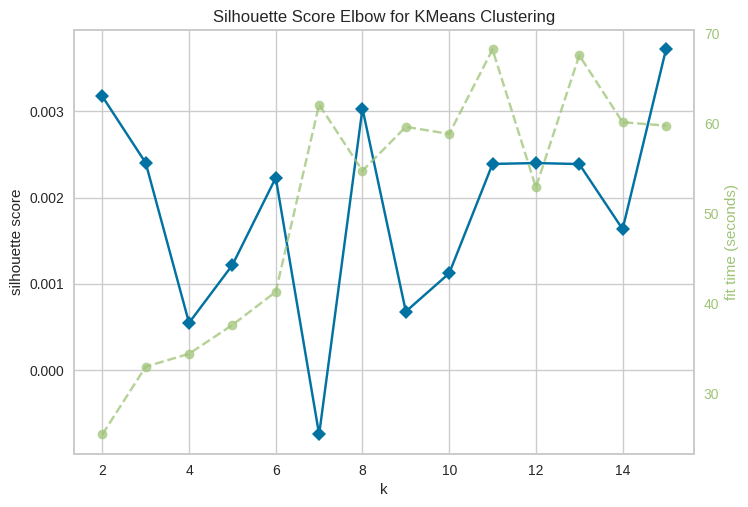

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [101]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0,n_init=10)
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(vectors_transformed)

# Finalize and render the figure
visualizer.show()

**From graph,silhoutte score is highest for 2 and 8 cluster.We will consider 8 cluster for kmeans analysis.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


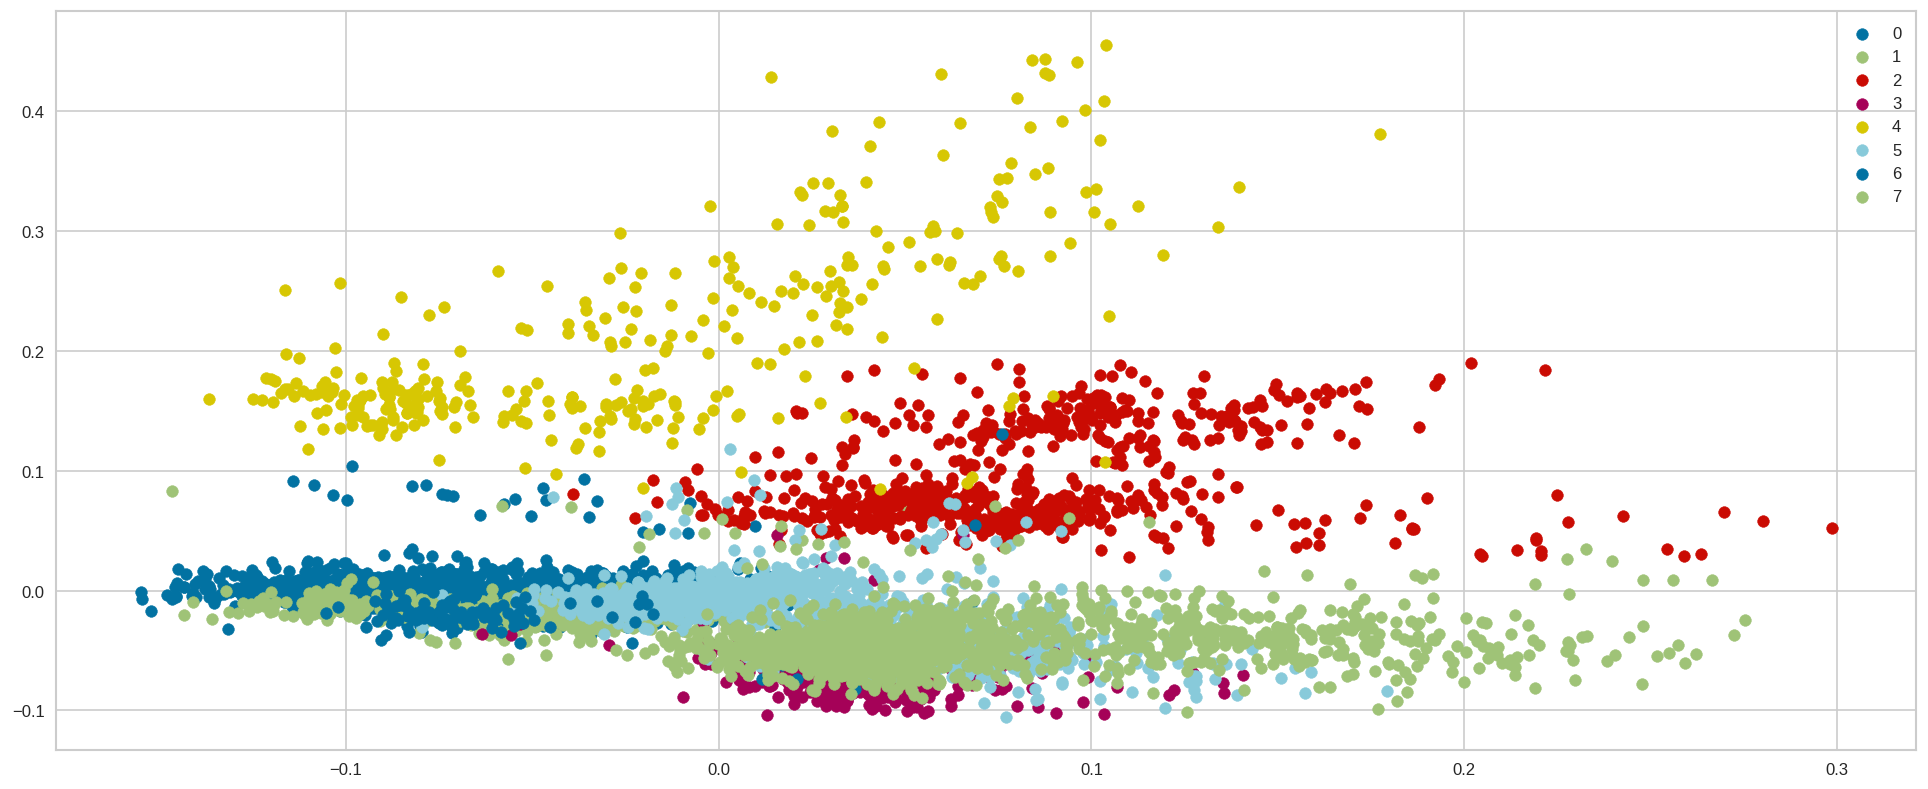

In [102]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=8, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(20,8), dpi=120)
label = kmeans.fit_predict(vectors_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(vectors_transformed[label == i , 0] , vectors_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [103]:
import plotly.express as px

clustered_data = pd.DataFrame({
    'x-axis': vectors_transformed[:, 0],
    'y-axis': vectors_transformed[:, 1],
    'z-axis': vectors_transformed[:, 2],
    'Cluster': kmeans.labels_
})

# Define custom colors for clusters
colors = ['royalblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'lightblue']

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(clustered_data, x='x-axis', y='y-axis', z='z-axis',
                     color='Cluster', color_discrete_sequence=colors,
                     title='K-Means Clustering in 3D')

# Customize the view angle (optional)
fig.update_layout(scene=dict(
    xaxis_title='x-axis',
    yaxis_title='y-axis',
    zaxis_title='z-axis'
))
fig.update_layout(scene_camera=dict(eye=dict(x=-1.25, y=-1.25, z=0.75)))

# Show the interactive plot
fig.show()


In [104]:
#adding cluster value to the dataframe
netflix_movies['cluster_number'] = kmeans.labels_

In [105]:
netflix_movies.head(1)

type title director                                               cast  \
0  TV Show    3%  Unknown  JoãoMiguel,BiancaComparato,MichelGomes,Rodolfo...   

  country  release_year  duration  \
0  Brazil          2020         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   

   year_added Content_Category                                         genres  \
0        2020    Adult Content  InternationalTVShows,TVDramas,TVSciFi&Fantasy   

                                                tags  cluster_number  
0  unknown jo omiguel biancacomparato michelgom r...               7

In [106]:
#counting number of movies/tv shows
cluster_content_count = netflix_movies['cluster_number'].value_counts().reset_index().rename(columns={'index':'clusters','cluster_number':'Movies/TV_Shows'})
cluster_content_count

clusters  Movies/TV_Shows
0         0             2803
1         7             1452
2         5             1344
3         2              703
4         1              662
5         3              366
6         4              334
7         6              106

## **Model performance using Evaluation metric Score Chart**

### **word cloud**

**A word cloud is a graphical representation of text data in which the size of each word represents its frequency or importance in a given text corpus. It is a popular visualization technique used to quickly and visually understand the most significant terms or words within a body of text.**

In [107]:
#word cloud
from wordcloud import WordCloud

def visualize_wordclouds(data, columns, num_clusters):
    print("Exploring Cluster", num_clusters)
    for column in columns:
        # Concatenate the values in the selected column
        text = ' '.join(data[column].astype(str))

        # Create a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='yellow').generate(text)

        # Plot the word cloud
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {column}')
        plt.axis('off')
        plt.show()


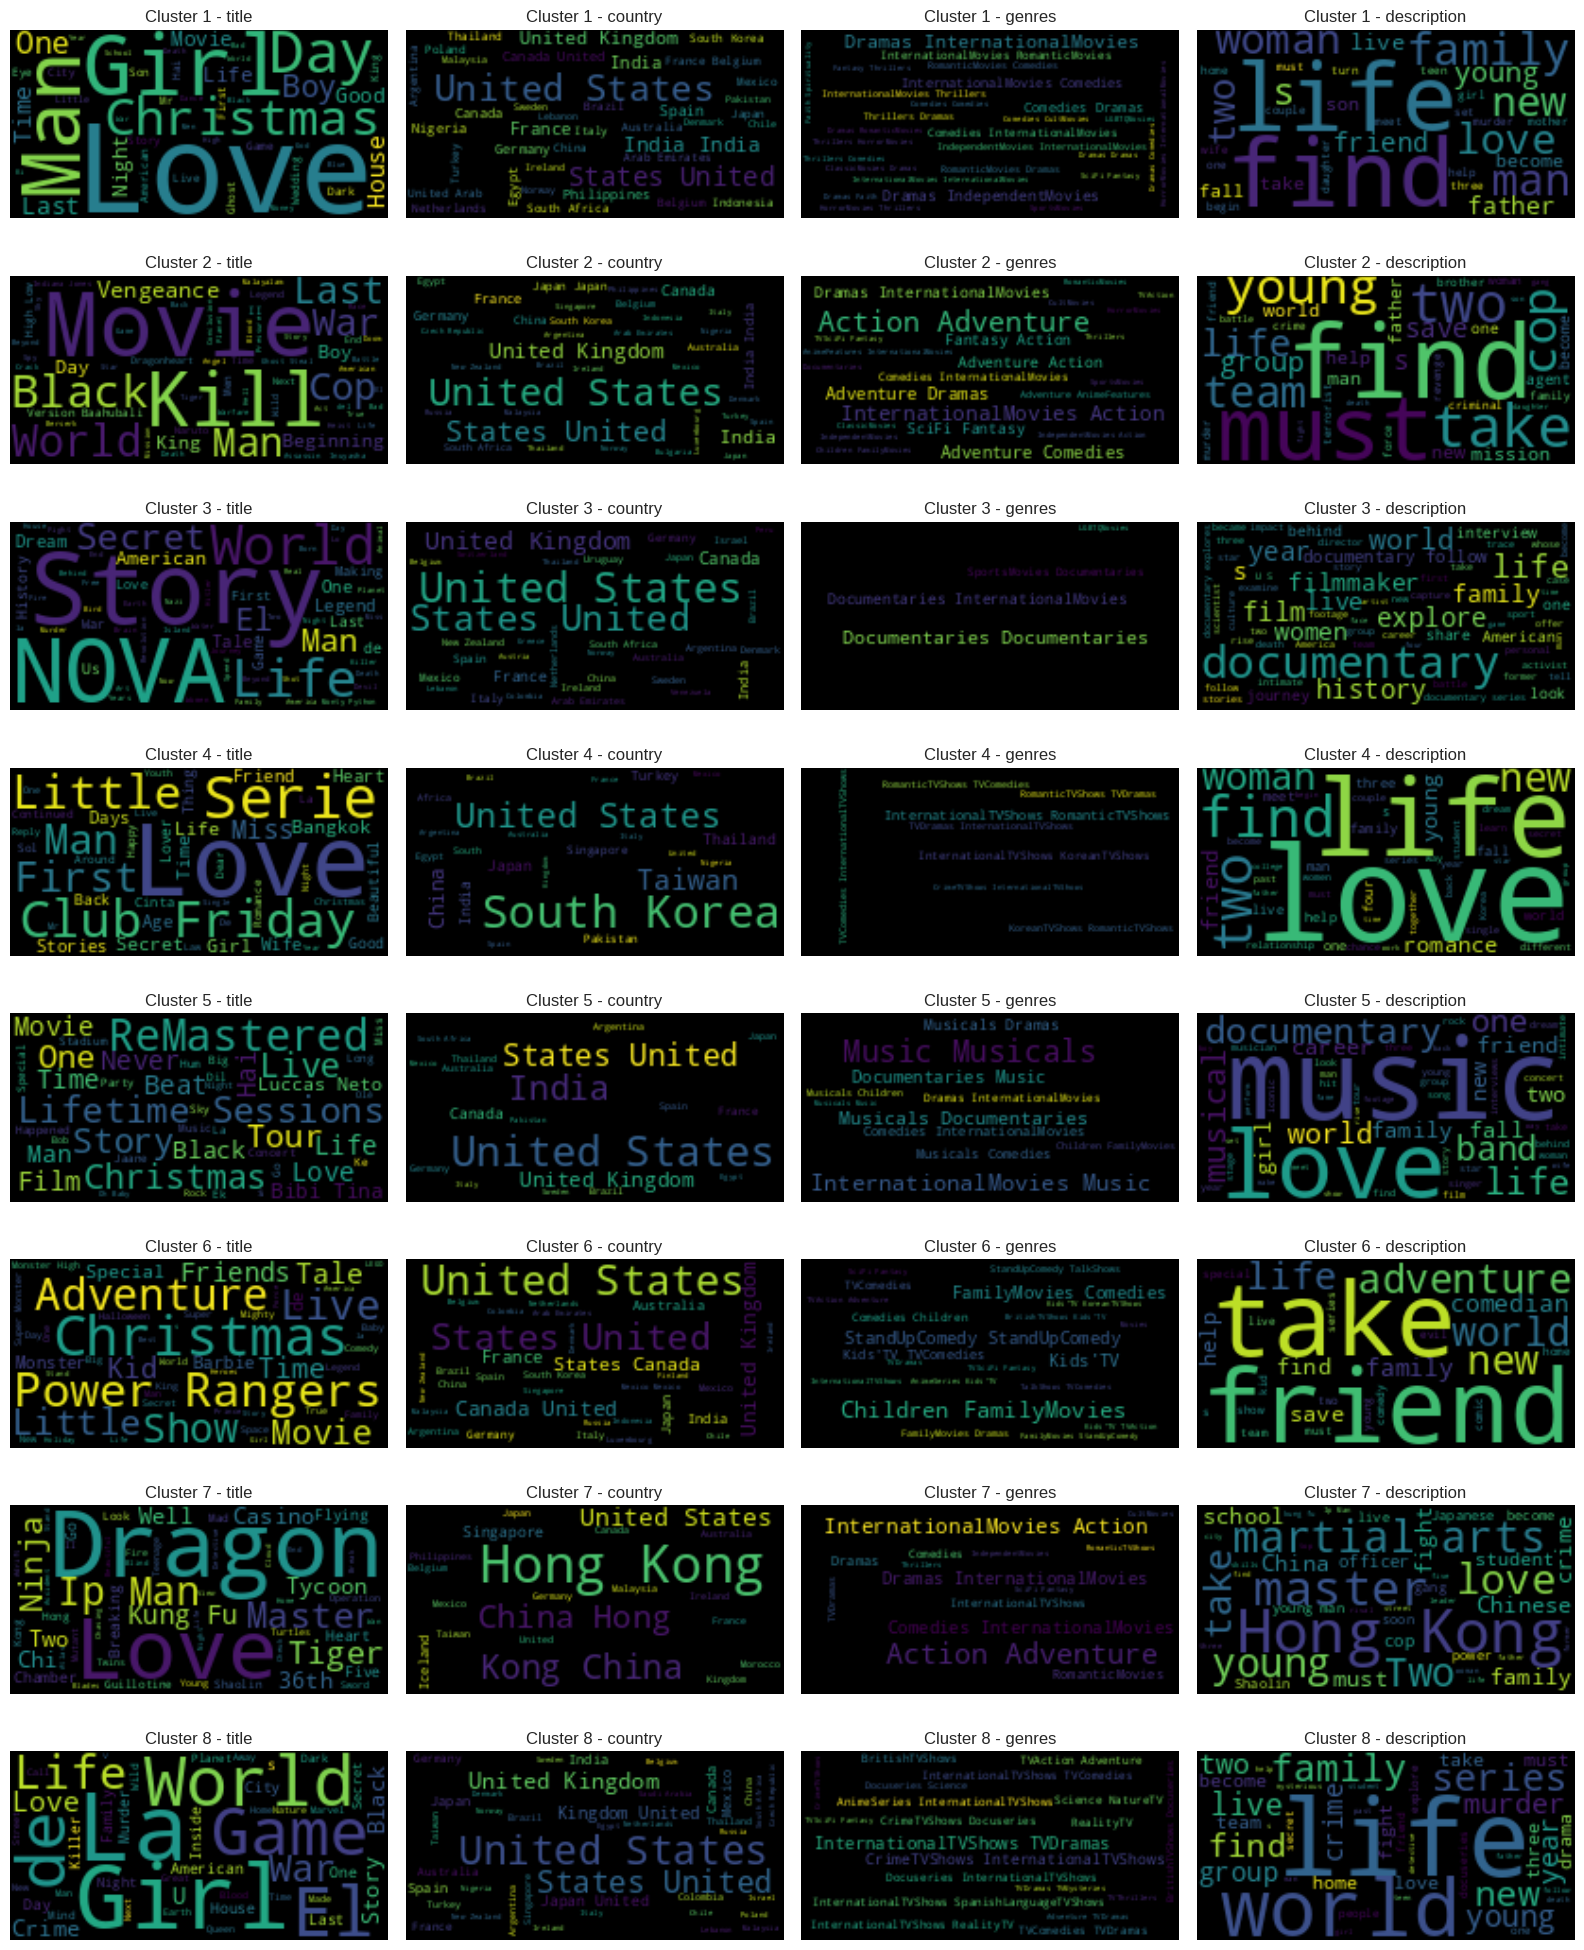

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# the columns to create word clouds for
columns = ['title', 'country', 'genres', 'description']

# the number of clusters
num_clusters = 8

# Create a figure with 8 rows and 4 columns for subplots
fig, axes = plt.subplots(nrows=num_clusters, ncols=len(columns), figsize=(16, 20))

# Iterate through each cluster
for cluster in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = netflix_movies[netflix_movies['cluster_number'] == cluster]

    # Iterate through each column
    for i, col in enumerate(columns):
        # Concatenate text data in the current column for the cluster
        text_data = ' '.join(cluster_data[col].astype(str))

        # Create a WordCloud
        wordcloud = WordCloud(width=200, height=100, background_color='black').generate(text_data)

        # Plot the WordCloud on the corresponding subplot
        axes[cluster, i].imshow(wordcloud, interpolation='bilinear')
        axes[cluster, i].set_title(f'Cluster {cluster+1} - {col}')
        axes[cluster, i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of WordClouds
plt.show()


## **Hierarchial Clustering**

**Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.**

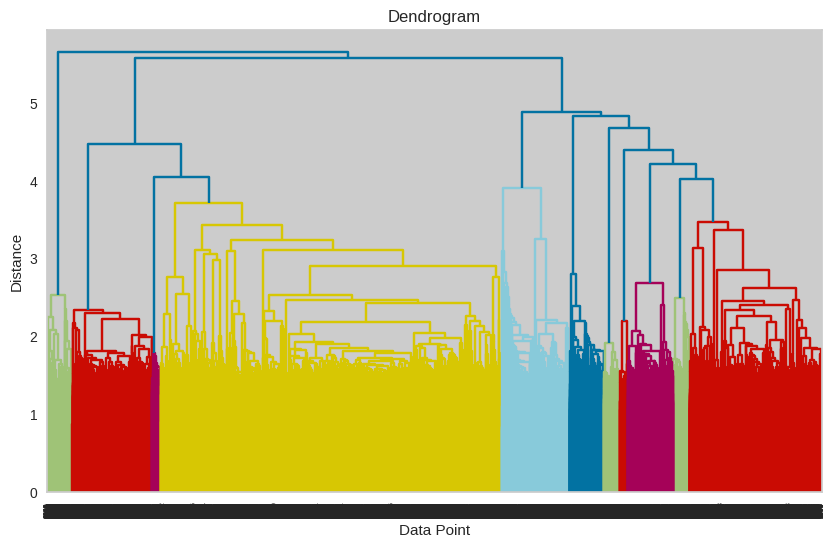

In [109]:
import scipy.cluster.hierarchy as sch


# Perform hierarchical clustering
linkage_matrix = sch.linkage(vectors_transformed, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=range(1, len(vectors_transformed) + 1))
plt.title('Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()


*   **A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.**
*   **From the above Dendogram we can say that optimal value of clusters is 5. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.**

In [110]:
# Computing Silhouette score for each k
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

for k in range(2,10):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(vectors_transformed)
  score = silhouette_score(vectors_transformed,labels)

  print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is -0.0010239051727030243
For n_clusters = 3, silhouette score is -0.0004693039506237111
For n_clusters = 4, silhouette score is -0.0005851744158906657
For n_clusters = 5, silhouette score is -0.00036574487744714493
For n_clusters = 6, silhouette score is -0.00010178464863410191
For n_clusters = 7, silhouette score is 0.00029952398673515566
For n_clusters = 8, silhouette score is -0.004921909299819491
For n_clusters = 9, silhouette score is -0.004603669029102765


**From the above silhouette scores it is clear that the 7 clusters are optimal value (maximum Silhouette score)**

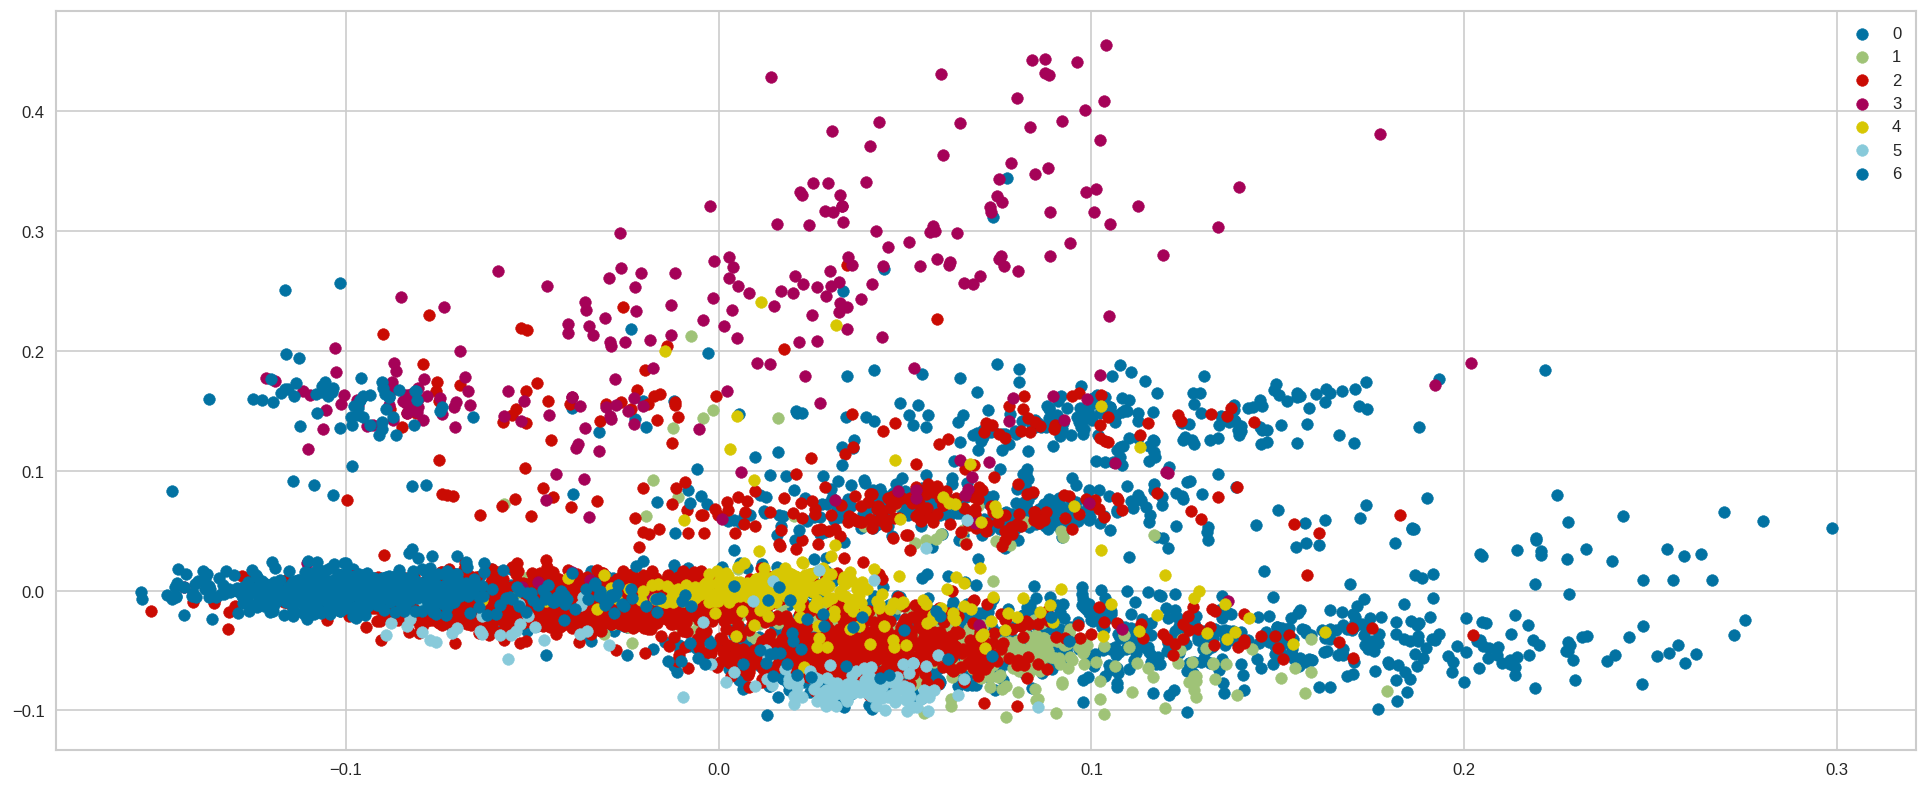

In [111]:
#training the AgglomerativeClusterings model on a dataset
model = AgglomerativeClustering(n_clusters = 7, metric = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(20,8), dpi=120)
label = model.fit_predict(vectors_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(vectors_transformed[label == i , 0] , vectors_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [112]:
clustered_data = pd.DataFrame({
    'x-axis': vectors_transformed[:, 0],
    'y-axis': vectors_transformed[:, 1],
    'z-axis': vectors_transformed[:, 2],
    'Cluster': model.labels_
})

# Define custom colors for clusters
colors = ['royalblue', 'orange', 'green','red','yellow','purple','cyan']

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(clustered_data, x='x-axis', y='y-axis', z='z-axis',
                     color='Cluster', color_discrete_sequence=colors,
                     title='K-Means Clustering in 3D')

# Customize the view angle (optional)
fig.update_layout(scene=dict(
    xaxis_title='x-axis',
    yaxis_title='y-axis',
    zaxis_title='z-axis'
))
fig.update_layout(scene_camera=dict(eye=dict(x=-1.25, y=-1.25, z=0.75)))

# Show the interactive plot
fig.show()

In [113]:
#adding cluster value to the dataframe
netflix_movies['agglomerative_cluster_number'] = model.labels_

In [114]:
netflix_movies.head(1)

type title director                                               cast  \
0  TV Show    3%  Unknown  JoãoMiguel,BiancaComparato,MichelGomes,Rodolfo...   

  country  release_year  duration  \
0  Brazil          2020         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   

   year_added Content_Category                                         genres  \
0        2020    Adult Content  InternationalTVShows,TVDramas,TVSciFi&Fantasy   

                                                tags  cluster_number  \
0  unknown jo omiguel biancacomparato michelgom r...               7   

   agglomerative_cluster_number  
0                             2

## **Model performance using Evaluation metric Score Chart**

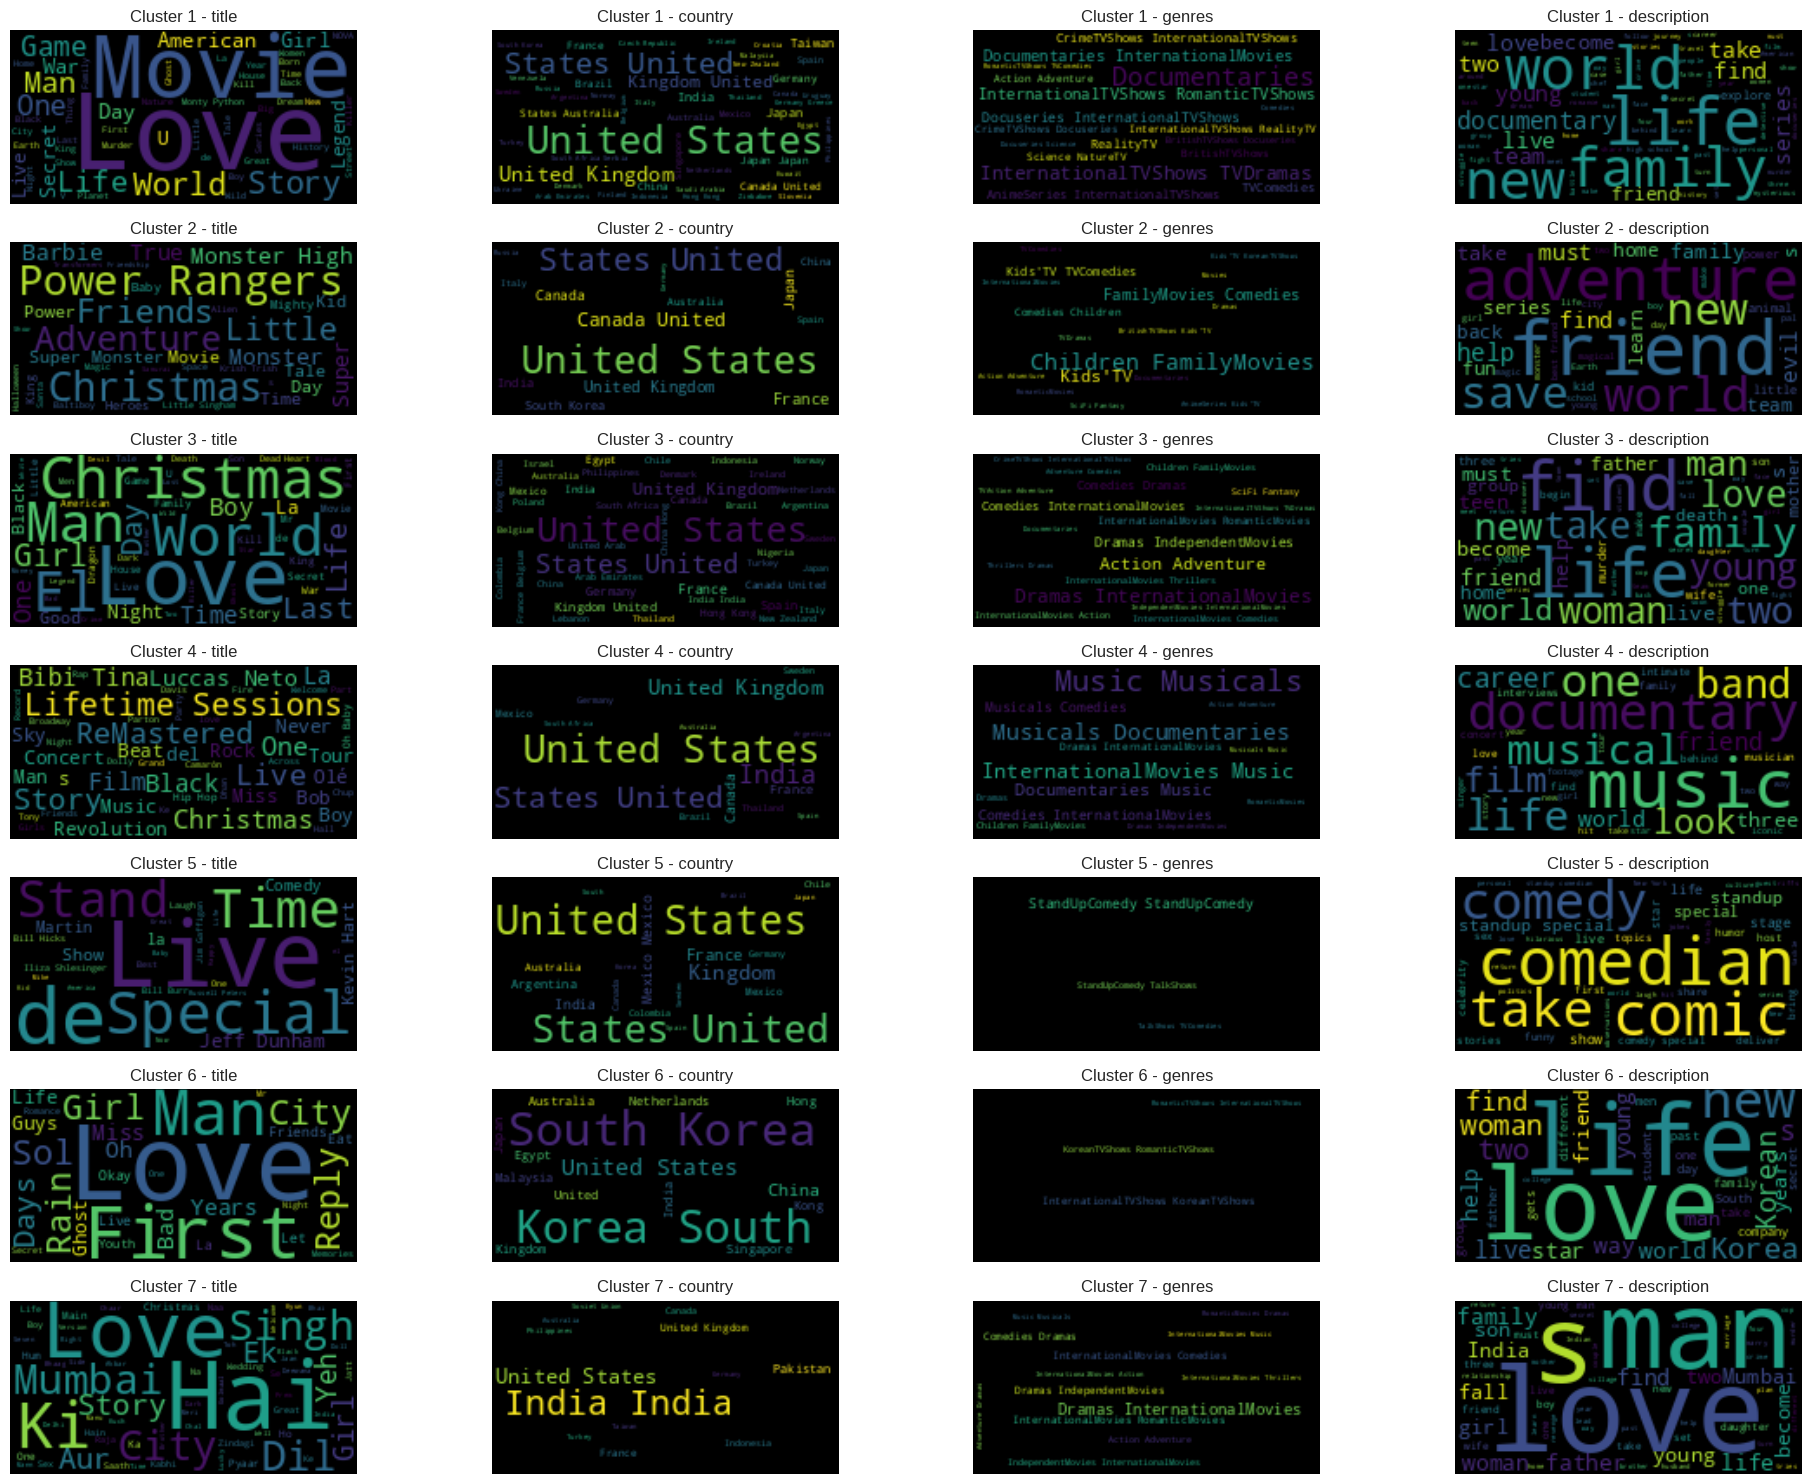

In [115]:

# the columns to create word clouds for
columns = ['title', 'country', 'genres', 'description']

# the number of clusters
num_clusters = 7

# Create a figure with 7 rows and 4 columns for subplots
fig, axes = plt.subplots(nrows=num_clusters, ncols=len(columns), figsize=(20, 15))

# Iterate through each cluster
for cluster in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = netflix_movies[netflix_movies['agglomerative_cluster_number'] == cluster]

    # Iterate through each column
    for i, col in enumerate(columns):
        # Concatenate text data in the current column for the cluster
        text_data = ' '.join(cluster_data[col].astype(str))

        # Create a WordCloud
        wordcloud = WordCloud(width=200, height=100, background_color='black').generate(text_data)

        # Plot the WordCloud on the corresponding subplot
        axes[cluster, i].imshow(wordcloud, interpolation='bilinear')
        axes[cluster, i].set_title(f'Cluster {cluster+1} - {col}')
        axes[cluster, i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of WordClouds
plt.show()


## **Movie Search Engine**

In [116]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Function to calculate Levenshtein distance
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

# Create widgets
search_text = widgets.Text(
    placeholder='Enter a movie name',
    description='Search:',
    disabled=False
)

output = widgets.Output()

# Define a function to handle the search
def search_movie(b):
    with output:
        output.clear_output()
        search_term = search_text.value.strip().lower()  # Convert search term to lowercase
        if search_term:
            # Initialize variables to keep track of the best match
            best_match = None
            best_distance = float('inf')

            # Perform approximate string matching using Levenshtein distance
            for title in netflix_movies['title']:
                distance = levenshtein_distance(search_term, title.lower())
                if distance < best_distance:
                    best_distance = distance
                    best_match = title

            if best_match and best_distance <= 2:  # You can adjust the threshold
                # Find the corresponding row in the DataFrame
                matching_row = netflix_movies[netflix_movies['title'] == best_match]
                title = matching_row['title'].values[0]
                country = matching_row['country'].values[0]
                release_year = matching_row['release_year'].values[0]

                # Create a DataFrame to hold the best matching movie information
                result_df = pd.DataFrame({
                    'Title': [title],
                    'Country': [country],
                    'Release Year': [release_year]
                })

                # Display the DataFrame
                display(result_df)
            else:
                print("This movie is not available.")

# Define a button for the search action
search_button = widgets.Button(description='Search')
search_button.on_click(search_movie)

# Display the widgets
display(search_text, search_button, output)


Title Country  Release Year
0  Dil Chahta Hai   India          2001

## **Movie Recommender System**

In [117]:
#importing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

#text vectorization
tf = TfidfVectorizer(stop_words='english')
new_vectors = tf.fit_transform(netflix_movies['tags'])

#calculating similarity for each movie with all movies
similarity = cosine_similarity(new_vectors)

def recommender(movie,similarity = similarity, data=netflix_movies):
  movie_index = data[data['title']== movie].index[0]
  similarity_array = similarity[movie_index]
  sorted_similarity = sorted(list(enumerate(similarity_array)),reverse = True, key=lambda x:x[1])[1:11]

  recommend_movies = []
  simlarity_scores = []

  for i in sorted_similarity:
    recommend_movie = data['title'].iloc[i[0]]
    simlarity_score = i[1]

    recommend_movies.append(recommend_movie)
    simlarity_scores.append(simlarity_score)

  recommend_df = pd.DataFrame({'Recommend_Movies':recommend_movies,'Similarity_Score':simlarity_scores})

  #return recommend_movies
  return recommend_df


In [118]:
recommender('Baahubali 2: The Conclusion (Hindi Version)')

Recommend_Movies  Similarity_Score
0      Baahubali 2: The Conclusion (Tamil Version)          0.936776
1  Baahubali 2: The Conclusion (Malayalam Version)          0.930824
2         Baahubali: The Beginning (Hindi Version)          0.507325
3       Baahubali: The Beginning (English Version)          0.447491
4         Baahubali: The Beginning (Tamil Version)          0.444388
5     Baahubali: The Beginning (Malayalam Version)          0.441623
6                                       Himmatwala          0.141496
7                                 Fakta Ladh Mhana          0.120683
8                                        Abdo Mota          0.117816
9                           Kabali (Hindi Version)          0.117712

In [119]:
recommender('Bhagam Bhag')

Recommend_Movies  Similarity_Score
0       Bhool Bhulaiyaa          0.236638
1          Chup Chup Ke          0.211879
2                 Billu          0.189792
3  Haseena Maan Jaayegi          0.172359
4  Deewana Main Deewana          0.161426
5         Hello Brother          0.151914
6       Phir Hera Pheri          0.151393
7               Welcome          0.137876
8  Life Ki Toh Lag Gayi          0.137657
9              Brothers          0.136490

In [120]:
recommender('A Murder in the Park')

Recommend_Movies  Similarity_Score
0                            The Bomb Squad          0.151092
1  Murder to Mercy: The Cyntoia Brown Story          0.146717
2                           Out of Thin Air          0.133866
3                                      13TH          0.133387
4                            Whose Streets?          0.121262
5                             I AM A KILLER          0.115722
6                                 Blackfish          0.114223
7                     Secrets of Chatsworth          0.113807
8                Virunga: Gorillas in Peril          0.111058
9                      The Confession Tapes          0.110994

In [121]:
recommender('Avengers: Infinity War')

Recommend_Movies  Similarity_Score
0                                     Thor: Ragnarok          0.135850
1  LEGO Marvel Super Heroes: Guardians of the Galaxy          0.105237
2                                                Her          0.100597
3                                      Hail, Caesar!          0.085670
4                                      Black Panther          0.083068
5                                                 IO          0.074024
6                                           Inkheart          0.068524
7                                             Legion          0.068005
8                       Mowgli: Legend of the Jungle          0.067678
9                                             Zodiac          0.067487

In [122]:
recommender('Vampires')

Recommend_Movies  Similarity_Score
0               Balto          0.132758
1            Dinotrux          0.126992
2  The Little Vampire          0.116270
3   Inhuman Resources          0.101894
4             Dracula          0.096180
5       The Originals          0.095029
6     Fary : Hexagone          0.091587
7  The World Is Yours          0.090792
8     Nothing to Hide          0.089897
9         Castlevania          0.089834

# **Conclusion**

*   **It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.**

*   **Most of these shows are released either at the end or the beginning of the year.**

*  **The United States and India are among the top five countries that produce all of the available content on the platform.**

*   **Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.**

*  **When it comes to content ratings, Adult Content tops the charts, indicating that mature content is more popular on Netflix.**

*   **Most movies on Netflix have durations between 80 to 120 minutes, while TV shows commonly have one or two seasons.**

*  **The optimal number of clusters we are getting from K-means is 8, whereas for Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 7.**

*   **We chose Silhouette Score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.**

*  **Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.**

# **Future Work**

*   **Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering can lead to numerous intriguing discoveries.**

*   **By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.**